# Semantic Analysis of Presidential Speeches 

In this notebook we explore the idiosyncracies of different presidents semantic styles and complexity.


In [3]:
import sys
sys.path.append("c:\\Users\\robal\\Dropbox\\UChicago\\Year II\\Quarter II\\Computational Content Analysis\\final_project")

In [54]:
from ContentAnalysisPresidentialRhetoric.utils.utils import *
import lucem_illud
import pandas as pd
import matplotlib.pyplot as plt 
import wordcloud 
import numpy as np 
import scipy 
import seaborn as sns
import sklearn.manifold 
import json 

import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#These are from the standard library
import os.path
import io
import sys
import matplotlib.pyplot as plt
import altair as alt

%matplotlib inline

In [5]:
nlp = spacy.load("en_core_web_sm")

In [8]:
speeches = pd.read_excel(r"../data/presidential_speeches.xlsx")
speeches = speeches.drop(columns="Unnamed: 0")
speeches["Speech"] = speeches.Speech.apply(lambda row: clean_raw_text([row])[0])
speeches['tokenized_text'] = speeches['Speech'].apply(lambda x: lucem_illud.word_tokenize(x))
speeches['normalized_text'] = speeches['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))
speeches.head()

President              Date  \
0     Joe Biden  January 20, 2021   
1  Donald Trump  January 19, 2021   
2  Donald Trump  January 13, 2021   
3  Donald Trump  January 07, 2021   
4  Donald Trump  January 06, 2021   

                                              Speech  \
0  Chief Justice Roberts, Vice President Harris, ...   
1  My fellow Americans: Four years ago, we launch...   
2  My fellow Americans,I want to speak to you ton...   
3  I would like to begin by addressing the heinou...   
4  I know your pain. I know your hurt.We had an e...   

                                      tokenized_text  \
0  [Chief, Justice, Roberts, Vice, President, Har...   
1  [My, fellow, Americans, Four, years, ago, we, ...   
2  [My, fellow, Americans, I, want, to, speak, to...   
3  [I, would, like, to, begin, by, addressing, th...   
4  [I, know, your, pain, I, know, your, hurt, We,...   

                                     normalized_text  
0  [chief, justice, roberts, vice, president, har...  
1  [fellow, americans, year, ago, launch, great, ...  
2  [fellow, americans, want, speak, tonight, trou...  
3  [like, begin, address, heinous, attack, unite,...  
4  [know, pain, know, hurt, election, steal, land...

In [12]:
# Check what the top 10 words each presidential address
speeches['top_10_words'] = speeches["tokenized_text"].apply(lambda tok_text: wordCounter(tok_text)[:10])

In [24]:
# Visualize 10 top words for each president
president_dict = {}
for president in speeches.President.unique():
    president_dict[president] = speeches.loc[speeches.President == president, 'tokenized_text'].sum()


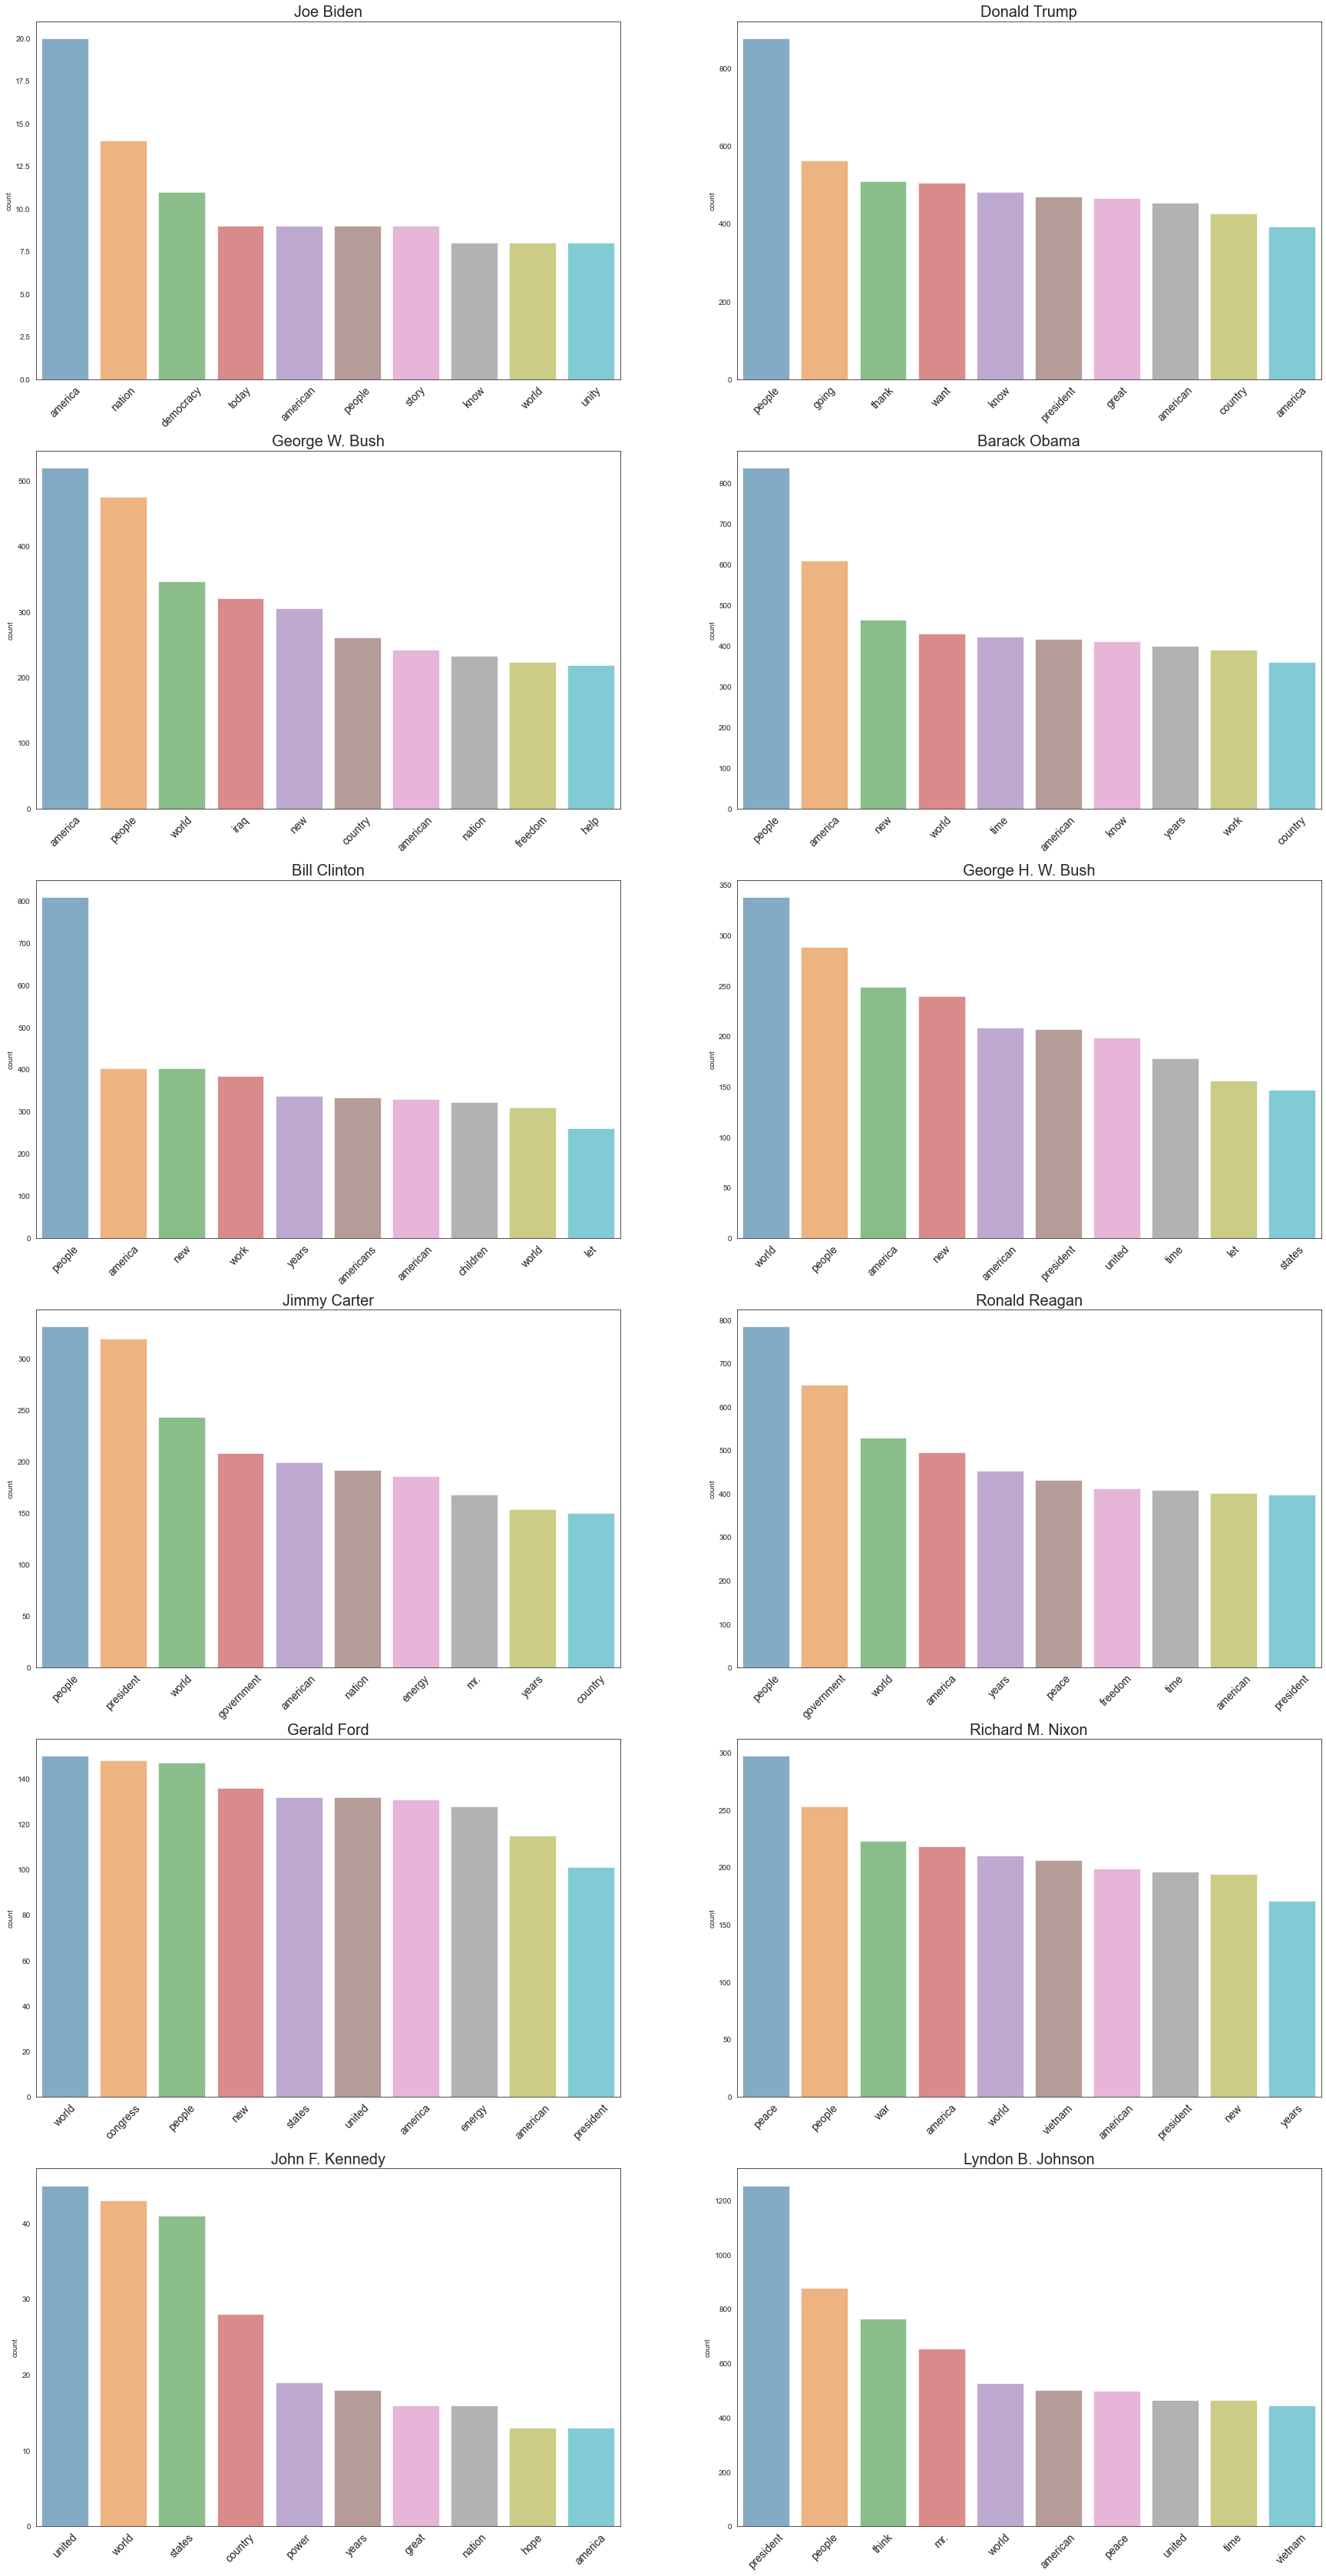

In [46]:
fig, ax = plt.subplots(6, 2, figsize=(30,60))
r = 0
c = 0
for i, president in enumerate(['Joe Biden', 'Donald Trump', 'Barack Obama', 'George W. Bush', 'Bill Clinton', 'George H. W. Bush', 'Ronald Reagan', 'Jimmy Carter', 'Gerald Ford',                               'Richard M. Nixon', 'Lyndon B. Johnson', 'John F. Kennedy']):
    
    df = wordCounter(president_dict[president])[:10]

    plt.sca(ax[r, c])
    p = sns.barplot(data=df, ax=ax[r, c],
                    x="word", y="count", alpha=.6)
    sns.set_style("white")

    plt.xticks(rotation=45)
    plt.xlabel("")
    ax[r, c].set_title(president)
    plt.rc('axes', titlesize=20)
    plt.rc('legend', fontsize=14)
    plt.rc('xtick', labelsize=14)

    if i%2 != 0:
        r += 1
    else: 
        c +=1

    if c>1:
        c=0 

Next we can use collocations on Barack Obama's famous 2009 speach

Seems like the rhetorical differences between both presidents are quite different even regarding the use of the same words!

In [60]:
# Plot the number of unique words used by each president
unique_words = {president: len(set(values)) for president, values in president_dict.items()}

unique_words_df = pd.DataFrame({"President":[president for president in unique_words.keys()], 
                                "unique_words": [unique_words[president] for president in unique_words.keys()]})


alt.Chart(unique_words_df, title='Unique words used by presidents in speeches').mark_bar().encode(
    x=alt.X('President:N',sort='-y'),
    y='unique_words',
    color=alt.Color('President', legend=None)).configure_axis(
    labelFontSize=20,
    titleFontSize=20).properties(
    width=400,
    height=500
)

alt.Chart(...)

In [65]:
speeches.columns

Index(['President', 'Date', 'Speech', 'tokenized_text', 'normalized_text',
       'top_10_words'],
      dtype='object')

In [66]:
speeches["sentiment"] = speeches.Speech.apply(lambda row: SentimentScorer.polarity_scores(row)["compound"])

KeyboardInterrupt: 

In [ ]:
alt.Chart(speeches,title=alt.TitleParams("Sentiment of presidential speeches",dx=165),
                           height=500, width=80).mark_point(size=200, filled=True).encode(
    x=alt.X(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=False, grid=False, labels=False),
        scale=alt.Scale(),
    ),
    y=alt.Y('sentiment:Q', scale=alt.Scale(domain=[14,48]), axis=alt.Axis(grid=False)),
    color=alt.Color('President:N', legend=None),
    column=alt.Column(
        'President:N',
        header=alt.Header(
            titleOrient='top',
            labelOrient='bottom',
            labelAlign='center',
            labelPadding=10,
        ),title="",
    )).transform_calculate(
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
)

In [239]:
# Import vader for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
SentimentScorer = SentimentIntensityAnalyzer()
inaugural_df["sentiment"] = inaugural_df.speach_content.apply(lambda row: SentimentScorer.polarity_scores(row)["compound"] )

In [132]:



line = alt.Chart(inaugural_df).mark_line().encode(
    x='year:N',
    y='sentiment',
    tooltip=['president', 'year'], 
    color= alt.value("#FFAA00")
)

point = alt.Chart(inaugural_df).mark_point().encode(
    x='year:N',
    y='sentiment', 
    color= alt.value("#5f90ae"),
)

alt.layer(line, point).configure_axis(
        labelFontSize=20,
        titleFontSize=20).properties(
        title='Inauguration Speaches Sentiment Scores')


    

alt.LayerChart(...)

Most presidents tend to paint very rosy and optimistic ideals during their inaugurations speaches. Most but not all. Lincoln in 1865 apparently was very frank about how dark of a period the civil war was for the nation.

# Filtering and normalizing text

As we want to start comparing the different releases we may choose to do a bit of filtering and normalizing that will allow us to focus on what we most care about. We can first make all of the words lower case, then drop the non-word tokens. Next, we can remove some 'stop words', stem the remaining words to remove suffixes, prefixes and (in some languages) infixes, or lemmatize tokens by intelligently grouping inflected or variant forms of the same word (e.g., with a stemmer and a dictionary). 

To begin this process, we will first define a function to work over the tokenized lists, then another to add normalized tokens to a new column.

We will be using spaCy's built in stop words identifying capacity. When we run text through spaCy's language pipeline, it automatically tags it as a stop word. 

We can remove these stopwords from the analysis by fiat, but we could also take a more principled approach by looking at the frequency distribution of words and selecting a specific cut-off associated with the preservation of 'meaningful words' identified upon inspection. Alternatively, we could automatically set a cut-off by rule, such as removal of all words more frequent then the most frequent verb, or the most frequent noun (not pronoun), or some term of central interest. 

In [137]:
countsDict = {}
for word in whReleases['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:20]

[('the', 179),
 ('of', 112),
 ('to', 112),
 ('and', 108),
 ('in', 64),
 ('a', 61),
 ("'s", 50),
 ('that', 41),
 ('our', 39),
 ('for', 35),
 ('on', 33),
 ('is', 33),
 ('Whitehouse', 31),
 ('Iraq', 28),
 ('Bush', 27),
 ('President', 25),
 ('troops', 21),
 ('by', 19),
 ('American', 19),
 ('with', 18)]

We can look at this and pick the cutoff, often at the first noun. So we will cut all words before `'Whitehouse'`.

In [138]:
#The stop list is then all words that occur before the first noun
stop_words_freq = []
for word, count in word_counts:
    if word == 'Whitehouse':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq

['the', 'of', 'to', 'and', 'in', 'a', "'s", 'that', 'our', 'for', 'on', 'is']

If we did have any extra words to add as stop words apart from those normally considered as stop words, we would add it to our stop words by passing it to the normalize tokens method. 

Now we can create our function to normalize the tokens

In [12]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [189]:
whReleases['normalized_tokens'] = whReleases['tokenized_text'].apply(lambda x: normalizeTokens(x))

whReleases['normalized_tokens_count'] = whReleases['normalized_tokens'].apply(lambda x: len(x))

whReleases

name  \
0  10Apr2007Whitehouse123.txt   
1    10Apr2008Whitehouse2.txt   
2    10Apr2008Whitehouse3.txt   
3   10Aug2007Whitehouse78.txt   
4   10Jan2008Whitehouse35.txt   
5    10Mar2008Whitehouse8.txt   
6   10Sep2007Whitehouse72.txt   
7  11Apr2007Whitehouse122.txt   
8  11Jan2007Whitehouse161.txt   
9    11Mar2008Whitehouse7.txt   

                                                text  \
0  SEN. WHITEHOUSE SHARES WESTERLY GIRL'S STORY I...   
1  SEN. WHITEHOUSE SAYS PRESIDENT BUSH MUST BEGIN...   
2  EPA MUST REVIEW LEGAL PROCESS TO ROOT OUT POLI...   
3  R.I. SENATORS PRAISE SEN. DENIAL OF LNG FACILI...   
4  SEN. WHITEHOUSE COMMENTS ON ONE-YEAR ANNIVERSA...   
5  SENS. REED, WHITEHOUSE WELCOME RHODE ISLAND ST...   
6  REP. WHITEHOUSE ISSUES STATEMENT ON GEN. PETRA...   
7  SEN. WHITEHOUSE URGES BUSH FOR NEW DIRECTION I...   
8  SENS. REED, WHITEHOUSE URGE PORTUGAL TO RECONS...   
9  WHITEHOUSE UNVEILS 'BUSH DEBT': $7.7 TRILLION ...   

                                        path  \
0  raw/Whitehouse/10Apr2007Whitehouse123.txt   
1    raw/Whitehouse/10Apr2008Whitehouse2.txt   
2    raw/Whitehouse/10Apr2008Whitehouse3.txt   
3   raw/Whitehouse/10Aug2007Whitehouse78.txt   
4   raw/Whitehouse/10Jan2008Whitehouse35.txt   
5    raw/Whitehouse/10Mar2008Whitehouse8.txt   
6   raw/Whitehouse/10Sep2007Whitehouse72.txt   
7  raw/Whitehouse/11Apr2007Whitehouse122.txt   
8  raw/Whitehouse/11Jan2007Whitehouse161.txt   
9    raw/Whitehouse/11Mar2008Whitehouse7.txt   

                                            html_url  \
0  https://github.com/lintool/GrimmerSenatePressR...   
1  https://github.com/lintool/GrimmerSenatePressR...   
2  https://github.com/lintool/GrimmerSenatePressR...   
3  https://github.com/lintool/GrimmerSenatePressR...   
4  https://github.com/lintool/GrimmerSenatePressR...   
5  https://github.com/lintool/GrimmerSenatePressR...   
6  https://github.com/lintool/GrimmerSenatePressR...   
7  https://github.com/lintool/GrimmerSenatePressR...   
8  https://github.com/lintool/GrimmerSenatePressR...   
9  https://github.com/lintool/GrimmerSenatePressR...   

                                        download_url  \
0  https://raw.githubusercontent.com/lintool/Grim...   
1  https://raw.githubusercontent.com/lintool/Grim...   
2  https://raw.githubusercontent.com/lintool/Grim...   
3  https://raw.githubusercontent.com/lintool/Grim...   
4  https://raw.githubusercontent.com/lintool/Grim...   
5  https://raw.githubusercontent.com/lintool/Grim...   
6  https://raw.githubusercontent.com/lintool/Grim...   
7  https://raw.githubusercontent.com/lintool/Grim...   
8  https://raw.githubusercontent.com/lintool/Grim...   
9  https://raw.githubusercontent.com/lintool/Grim...   

                                      tokenized_text  \
0  [SEN, WHITEHOUSE, SHARES, WESTERLY, GIRL, 'S, ...   
1  [SEN, WHITEHOUSE, SAYS, PRESIDENT, BUSH, MUST,...   
2  [EPA, MUST, REVIEW, LEGAL, PROCESS, TO, ROOT, ...   
3  [R.I., SENATORS, PRAISE, SEN, DENIAL, OF, LNG,...   
4  [SEN, WHITEHOUSE, COMMENTS, ON, ONE, YEAR, ANN...   
5  [SENS, REED, WHITEHOUSE, WELCOME, RHODE, ISLAN...   
6  [REP, WHITEHOUSE, ISSUES, STATEMENT, ON, GEN, ...   
7  [SEN, WHITEHOUSE, URGES, BUSH, FOR, NEW, DIREC...   
8  [SENS, REED, WHITEHOUSE, URGE, PORTUGAL, TO, R...   
9  [WHITEHOUSE, UNVEILS, BUSH, DEBT, $, 7.7, TRIL...   

                                   normalized_tokens  normalized_tokens_count  
0  [sen, whitehouse, share, westerly, girl, story...                      224  
1  [sen, whitehouse, say, president, bush, begin,...                      159  
2  [epa, review, legal, process, root, political,...                      298  
3  [r.i, senator, praise, sen, denial, lng, facil...                      116  
4  [sen, whitehouse, comment, year, anniversary, ...                      125  
5  [sen, reed, whitehouse, welcome, rhode, island...                      197  
6  [rep, whitehouse, issue, statement, gen, petra...                      118  
7  [sen, whitehouse, urg

You can see that in the final step of normalizing, we add the lemmatized form of the word. spaCy's built in lemmatizer does this (https://spacy.io/api/lemmatizer). Lemmatization can be thought of as finding the root or the base of the word after removing inflections and other variations of words. Another possible way of finding the roots of words is using NLTK's porting or stemming functionalities, but we will not be getting into them.

Now that it is cleaned we start analyzing the dataset. We can start by finding frequency distributions for the dataset. Lets start looking at all the press releases together. The [`ConditionalFreqDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ConditionalProbDist) class reads in an iterable of tuples, the first element is the condition and the second the focal word. For starters, we will use word lengths as the conditions, but tags or clusters will provide more useful results.

In [141]:
#.sum() adds together the lists from each row into a single list tuples (length of word, word)
whcfdist = nltk.ConditionalFreqDist(((len(w), w) for w in whReleases['normalized_tokens'].sum()))

#print the number of words
print(whcfdist.N())

1964


From this we can lookup the distributions of different word lengths

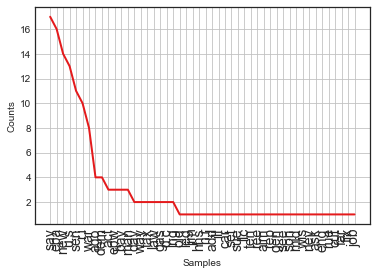

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [142]:
whcfdist[3].plot() # distribution of words given that length of word = 3

We can also create a Conditional Probability Distribution or [`ConditionalProbDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ConditionalProbDist) from the `ConditionalFreqDist`. To do this, however, we need a model for the probability distribution. A simple model is [`ELEProbDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ELEProbDist) which gives the expected likelihood estimate for the probability distribution of the experiment used to generate the observed frequency distribution. 

In [145]:
whcpdist = nltk.ConditionalProbDist(whcfdist, nltk.ELEProbDist)

#print the most common 2 letter word
print(whcpdist[2].max())

#And its probability
print(whcpdist[2].prob(whcpdist[2].max()))

ri
0.25


Length is one feature of a word, but there are many more important features we care about. Another critical feature is a word's role in the sentence, or its part of speech (POS). 

The method below works similarly to ```nltk.pos_text```, and can work with the conditional frequency distributions it provides.

In [15]:
def spacy_pos(word_string):
    tags = []
    doc = nlp(word_string.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [147]:
whReleases['normalized_tokens_POS'] = [spacy_pos(t) for t in whReleases['text']]

This gives us a new column with the part of speech as a short initialism and the word in a tuple, exactly how the `nltk.ConditionalFreqDist()` function wants them. We can now construct another conditional frequency distribution.

In [150]:
whcfdist_WordtoPOS = nltk.ConditionalFreqDist(whReleases['normalized_tokens_POS'].sum())
list(whcfdist_WordtoPOS.items())[:10]

[('sen', FreqDist({'NNP': 9})),
 ('.', FreqDist({'.': 125, 'NNP': 41})),
 ('whitehouse', FreqDist({'NN': 19, 'NNP': 12, 'VB': 8, 'VBP': 1})),
 ('shares', FreqDist({'NNS': 1})),
 ('westerly', FreqDist({'NNP': 2})),
 ('girl', FreqDist({'NN': 2})),
 ("'s", FreqDist({'POS': 47, 'VBZ': 5})),
 ('story', FreqDist({'NN': 2})),
 ('in', FreqDist({'IN': 72})),
 ('push', FreqDist({'NN': 1}))]

This gives the frequency of each word as each part of speech...which can be uninformative and boring. What we want is the converse; the frequency of each part of speech for each word.

In [151]:
whcfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in whReleases['normalized_tokens_POS'].sum())

We can now identify and collect all of the superlative adjectives

In [152]:
whcfdist_POStoWord['JJ']

FreqDist({'american': 17, 'new': 10, 'portuguese': 9, 'political': 8, 'federal': 6, 'clear': 5, 'potential': 5, 'fiscal': 5, 'last': 4, 'several': 4, ...})

Or look at the most common nouns

In [153]:
whcfdist_POStoWord['NN'].most_common(5)

[('whitehouse', 19),
 ('today', 15),
 ('stem', 12),
 ('year', 12),
 ('administration', 11)]

Or plot the base form verbs against their number of occurrences

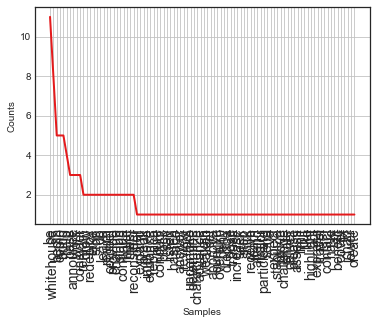

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [154]:
whcfdist_POStoWord['VB'].plot()

We can then do a similar analysis of the word probabilities

In [155]:
whcpdist_POStoWord = nltk.ConditionalProbDist(whcfdist_POStoWord, nltk.ELEProbDist)

#print the most common nouns
print(whcpdist_POStoWord['NN'].max())

#And its probability
print(whcpdist_POStoWord['NN'].prob(whcpdist_POStoWord['NN'].max()))

whitehouse
0.025390625


We can even create a...wait for it...*WORD CLOUD* or Wordl to gaze at and draw mystical, approximate inferences about important nouns and verbs in our corpus:

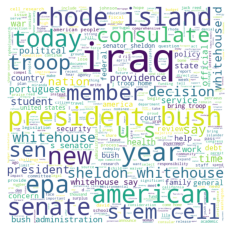

In [156]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(whReleases['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("whitehouse_word_cloud.pdf", format = 'pdf')

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a wordl of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</span>

In [13]:
import csv
from contextlib import closing

In [14]:
# Load list of presidents by pary
url="https://gist.githubusercontent.com/namuol/2657233/raw/74135b2637e624848c163759be9cd14ae33f5153/presidents.csv"


In [15]:
president_dict = {"name":[], "party":[]}
with requests.get(url, stream=True) as r:
    lines = (line.decode('utf-8') for line in r.iter_lines())
    for i, row in enumerate(csv.reader(lines)):
        if i == 0:
            continue
        president_dict["name"].append(row[1].split()[-1])
        president_dict["party"].append(row[5].strip())
president_df = pd.DataFrame(president_dict)
# Correct for Cleveland's second term
president_df.iloc[23, 0] = "Cleveland"
president_df = president_df.append({"name":"Trump", "party":"Republican"}, ignore_index=True)

In [16]:
# append party to inaugural dataframe
inaugural_df_new = inaugural_df.merge(president_df,how='inner', left_on="president",right_on="name")
inaugural_df_new.drop(columns="name", inplace=True)
inaugural_df_new.drop_duplicates(subset=['president', 'year'], inplace=True)

In [17]:
def spacy_pos_updated(word_list):
    """
    Update spacy_pos function to work on list of tokens rather than on long string. 
    :param word_list: list of str words
    :retrun tags: list of tupples (word, POS_tag)
    """
    long_string = " ".join(word_list)
    doc = nlp(long_string.lower())
    tags = []
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [18]:
# Normalize by lemmatizing
inaugural_df_new["normalized_text"] = inaugural_df_new['tokenized_text'].apply(lambda x: normalizeTokens(x))

# Get POS tagging for normalized text
inaugural_df_new['normalized_tokens_POS'] = [spacy_pos_updated(t) for t in inaugural_df_new['normalized_text']]

In [31]:
# Create conditional frequency distributions for words given word-length
word_len_dist = nltk.ConditionalFreqDist(((len(w), w) for w in inaugural_df_new['normalized_text'].sum()))

# Create conditional frequency distribution for each POS tag
inaugural_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in inaugural_df_new['normalized_tokens_POS'].sum())

In [327]:
print("Most used verbs in inaugural address:")
inaugural_POStoWord["VB"]

Most used verbs in inaugural address:


FreqDist({'come': 51, 'find': 49, 'give': 48, 'maintain': 47, 'let': 47, 'take': 44, 'promote': 41, 'establish': 39, 'seek': 34, 'stand': 33, ...})

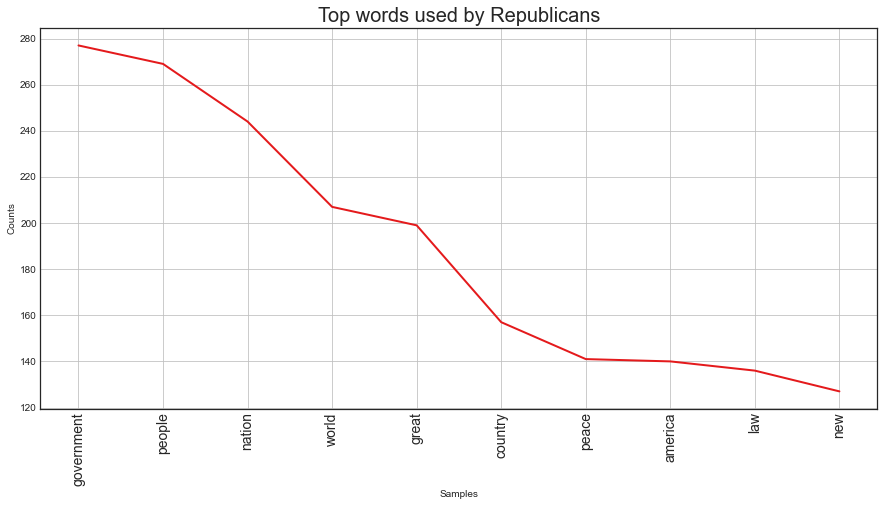

<AxesSubplot:title={'center':'Top words used by Republicans'}, xlabel='Samples', ylabel='Counts'>

In [293]:
# Calculate the Frequency Distribution for Republicans
freqDistRepublicans =  nltk.FreqDist(w for w in inaugural_df_new.loc[inaugural_df_new.party=="Republican",'normalized_text'].sum())

# Calculate the Frequency Distribution for Democrats
freqDistDemocrats =  nltk.FreqDist(w for w in inaugural_df_new.loc[inaugural_df_new.party=="Democratic",'normalized_text'].sum())

# Plot Distribution of top 10 words used
fig, ax = plt.subplots(1, 1, figsize=(15,7))
ax.set_title("Top words used by Republicans")
freqDistRepublicans.plot(10)

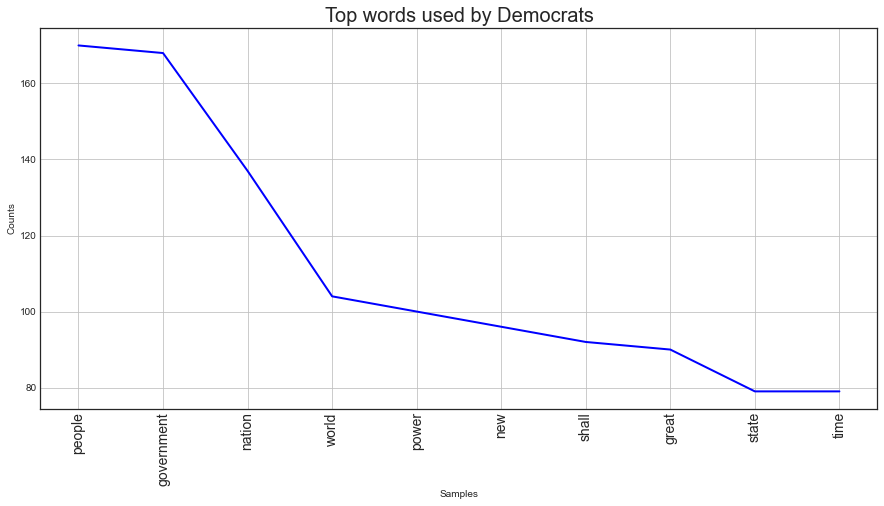

<AxesSubplot:title={'center':'Top words used by Democrats'}, xlabel='Samples', ylabel='Counts'>

In [292]:
# Plot Distribution of top 10 words used by Democrats
fig, ax = plt.subplots(1, 1, figsize=(15,7))
ax.set_title("Top words used by Democrats")
freqDistDemocrats.plot(10, color="Blue")

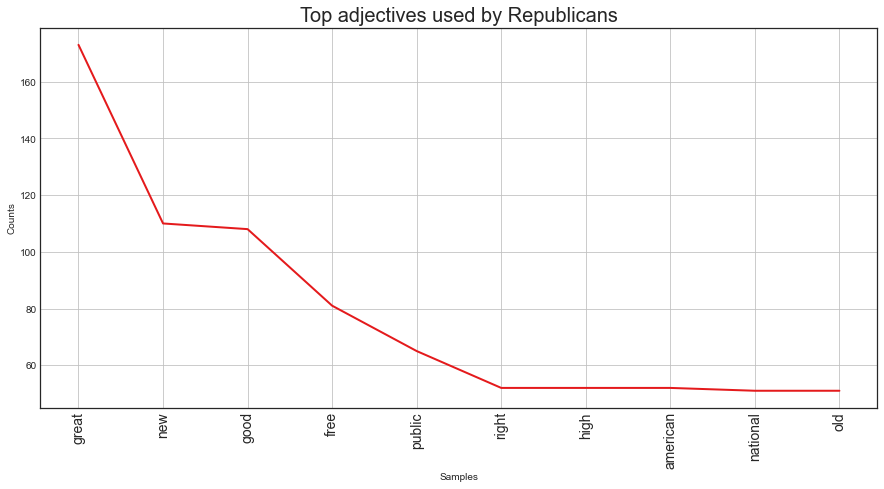

<AxesSubplot:title={'center':'Top adjectives used by Republicans'}, xlabel='Samples', ylabel='Counts'>

In [294]:
# Create conditional frequency distribution for each POS tag for different parties
inaugural_POStoWord_Republican = nltk.ConditionalFreqDist((p, w) for w, p in inaugural_df_new.loc[inaugural_df_new.party=="Republican",'normalized_tokens_POS'].sum())
inaugural_POStoWord_Democrats = nltk.ConditionalFreqDist((p, w) for w, p in inaugural_df_new.loc[inaugural_df_new.party=="Democratic",'normalized_tokens_POS'].sum())

# Repeat plots from above with conditional frequency to see most used superlative adjectives 
# Plot Distribution of top 10 words used
fig, ax = plt.subplots(1, 1, figsize=(15,7))
ax.set_title("Top adjectives used by Republicans")
inaugural_POStoWord_Republican["JJ"].plot(10)

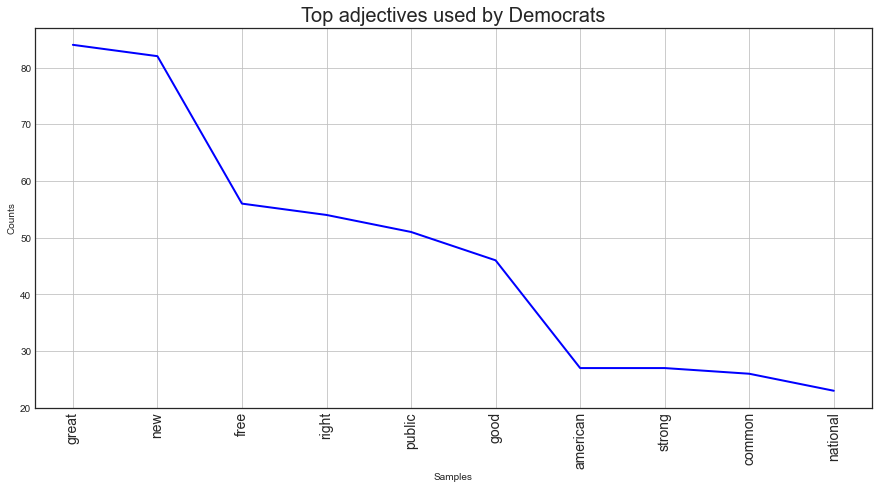

<AxesSubplot:title={'center':'Top adjectives used by Democrats'}, xlabel='Samples', ylabel='Counts'>

In [296]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
ax.set_title("Top adjectives used by Democrats")
inaugural_POStoWord_Democrats["JJ"].plot(10, color="blue")

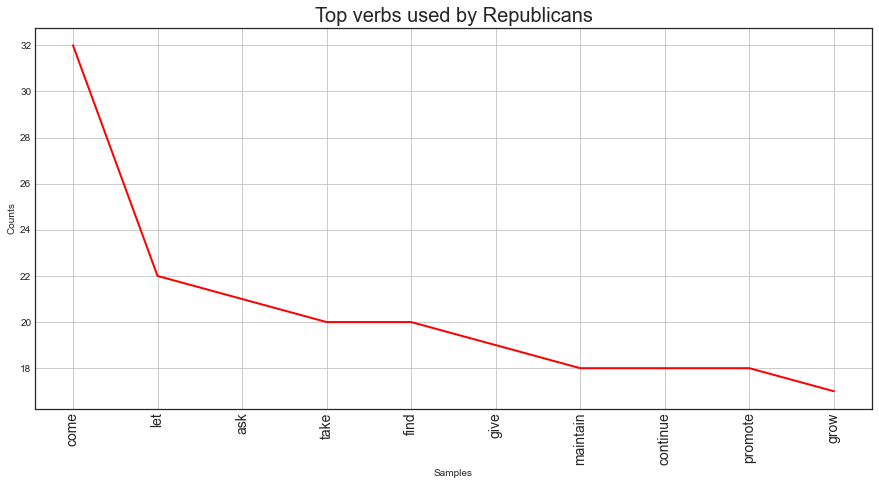

<AxesSubplot:title={'center':'Top verbs used by Republicans'}, xlabel='Samples', ylabel='Counts'>

In [331]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
ax.set_title("Top verbs used by Republicans")
inaugural_POStoWord_Republican["VB"].plot(10, color="red")

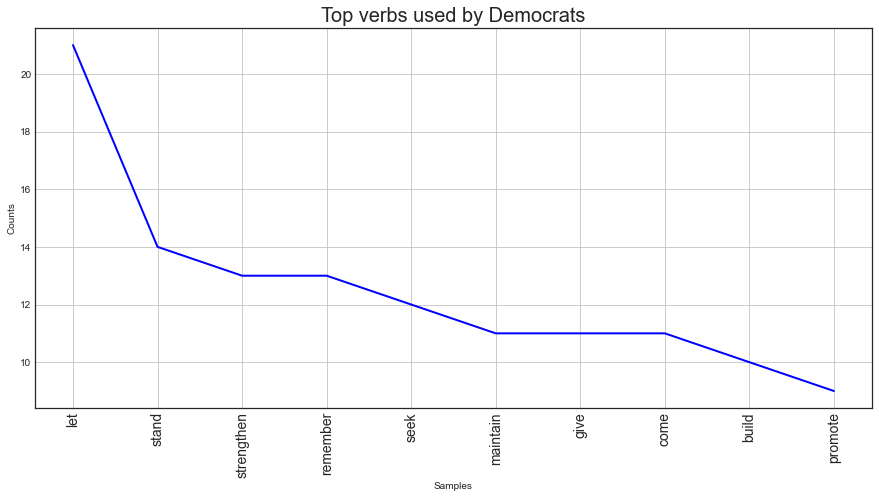

<AxesSubplot:title={'center':'Top verbs used by Democrats'}, xlabel='Samples', ylabel='Counts'>

In [328]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
ax.set_title("Top verbs used by Democrats")
inaugural_POStoWord_Democrats["VB"].plot(10, color="blue")

From the previous analysis we see that historically presidents from both parties use similar adjectives during their inaugural address. There is a slight difference when looking at all words, with Democrats using the word "power" and "state" very often and Republicans using the words "country" and "america" often, there are also some differences in the verbs commonly used with Democrats using "strengthen" often. From this superficial analysis it seems the rhetoric of presidents when grouping by pary is not as clear as when comparing two individuals as we saw above. 

(-0.5, 2499.5, 1799.5, -0.5)

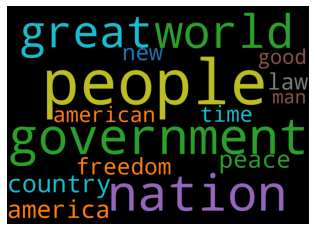

In [316]:
import matplotlib.colors as mcolors
wc=wordcloud.WordCloud(width=2500,height=1800,
          max_words=15, colormap='tab10',
          prefer_horizontal=1.0).generate(' '.join(inaugural_df_new.loc[inaugural_df_new.party=="Republican",'normalized_text'].sum()))
plt.imshow(wc)
plt.axis("off")

(-0.5, 2499.5, 1799.5, -0.5)

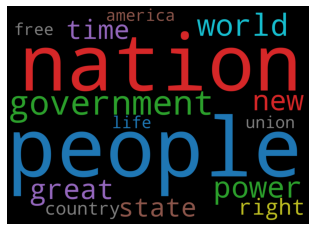

In [317]:
import matplotlib.colors as mcolors
wc=wordcloud.WordCloud(width=2500,height=1800,
          max_words=15, colormap='tab10',
          prefer_horizontal=1.0).generate(' '.join(inaugural_df_new.loc[inaugural_df_new.party=="Democratic",'normalized_text'].sum()))
plt.imshow(wc)
plt.axis("off")

## Davies Corpora

Now that we have our basic cleaning down, we can arrange our Davies Corpora. Let us try this with the movies corpora we have already loaded.

We'll use a smaller corpus of a 1000 movies for this demonstration.

In [59]:
zfile = zipfile.ZipFile(corpus_name + "/sources_movies.zip")
source = []

In [60]:
for file in zfile.namelist():
    with zfile.open(file) as f:
        for line in f:
            source.append(line)

In [320]:
source[0:20]

[b'textID\tfileID\t#words\tgenre\tyear\tlanguage(s)\tcountry\timdb\ttitle\r\n',
 b'-----\t-----\t-----\t-----\t-----\t-----\t-----\t-----\t-----\r\n',
 b'\r\n',
 b'290635\t3547424\t4722\tShort, Musical\t1930\tUK\tEnglish\t0290635\tGoodbye to All That\r\n',
 b'21165\t6332374\t10220\tCrime, Mystery, Thriller\t1930\tUK\tEnglish\t0021165\tMurder!\r\n',
 b'21191\t6013789\t5281\tDrama, Romance\t1930\tUSA\tEnglish\t0021191\tA Notorious Affair\r\n',
 b'20620\t3660608\t6724\tBiography, Drama, History\t1930\tUSA\tEnglish\t0020620\tAbraham Lincoln\r\n',
 b'20629\t60053\t9552\tDrama, War\t1930\tUSA\tEnglish, French, German, Latin\t0020629\tAll Quiet on the Western Front\r\n',
 b'20640\t6850720\t13862\tComedy, Musical\t1930\tUSA\tEnglish\t0020640\tAnimal Crackers\r\n',
 b'20641\t176501\t11140\tDrama, Romance\t1930\tUSA\tEnglish\t0020641\tAnna Christie\r\n',
 b'20643\t3603861\t1748\tComedy, Short\t1930\tUSA\tEnglish\t0020643\tAnother Fine Mess\r\n',
 b'20670\t4159455\t6966\tComedy, Musical\t1930\tUS

It looks dirty because the file is encoded as bytes, but we can certainly see the information there. The file id is also present in the original raw text data: as the first "word". Look back at the normalized/tokenized words to confirm that. We're going to use this to create a dataframe with: Fileid, movie name, genre, year, and country.

It is advised that you run a similar check of the source file before you do other extraction.

First, let us create a dictionary mapping file-id to all the text. Each movie will be mapped to a list of the tokenized words.

In this example, I only use it to load 100 movies. You can comment this out or increase/decrease the number as you see fit.

In [61]:
movie_texts = {}

In [62]:
for files in movie_raw:
    if len(movie_texts) > 100:
        break
    movies = clean_raw_text(movie_raw[files][1:])
    for movie in movies:
        txts = lucem_illud.word_tokenize(movie)
        try:
            movie_texts[txts[0][2:]] = txts[1:]
        except IndexError:
            continue

In [63]:
movie_df = pd.DataFrame(columns=["Movie Name", "Genre", "Year", "Country", "Tokenized Texts"])

In [64]:
for movie in source[3:]:
    try:
        tid, fileid, total_words, genre, year, lang, country, imdb, title = movie.decode("utf-8").split("\t")
    except UnicodeDecodeError:
        continue
    try:
        movie_df.loc[fileid.strip()] = [title.strip(), genre.strip(), year.strip(), country.strip(), movie_texts[fileid.strip()]]
    except KeyError:
        continue

In [65]:
movie_df.head()

Movie Name                    Genre  Year  \
3435788     Born Reckless  Crime, Drama, Film-Noir  1930   
6880640        Dishonored      Drama, Romance, War  1931   
5482259        Indiscreet   Comedy, Drama, Musical  1931   
5192597  The Stolen Jools            Comedy, Short  1931   
3982760     College Humor                   Comedy  1933   

                          Country  \
3435788  English, Italian, French   
6880640                   English   
5482259                   English   
5192597                   English   
3982760                   English   

                                           Tokenized Texts  
3435788  [Louis, Louis, Beretti, Shh, Put, that, out, y...  
6880640  [I, thought, I, smelled, gas, That, 's, three,...  
5482259  [Subtitles, Lu, s, Filipe, Bernardes, Wait, Yo...  
5192597  [Subtitles, Lu, s, Filipe, Bernardes, Hello, W...  
3982760  [Play, ball, Although, the, game, seems, uphil...

# Part-of-Speech (POS) tagging

In POS tagging, we classify each word by its semantic role in a sentence. We will be using the in-built spaCy pos-tagging.

https://spacy.io/usage/linguistic-features

|#. |Tag |Description |
|---|----|------------|
|1.	|CC	|Coordinating conjunction
|2.	|CD	|Cardinal number
|3.	|DT	|Determiner
|4.	|EX	|Existential there
|5.	|FW	|Foreign word
|6.	|IN	|Preposition or subordinating conjunction
|7.	|JJ	|Adjective
|8.	|JJR|	Adjective, comparative
|9.	|JJS|	Adjective, superlative
|10.|	LS	|List item marker
|11.|	MD	|Modal
|12.|	NN	|Noun, singular or mass
|13.|	NNS	|Noun, plural
|14.|	NNP	|Proper noun, singular
|15.|	NNPS|	Proper noun, plural
|16.|	PDT	|Predeterminer
|17.|	POS	|Possessive ending
|18.|	PRP	|Personal pronoun
|19.|	PRP\$|	Possessive pronoun
|20.|	RB	|Adverb
|21.|	RBR	|Adverb, comparative
|22.|	RBS	|Adverb, superlative
|23.|	RP	|Particle
|24.|	SYM	|Symbol
|25.|	TO	|to
|26.|	UH	|Interjection
|27.|	VB	|Verb, base form
|28.|	VBD	|Verb, past tense
|29.|	VBG	|Verb, gerund or present participle
|30.|	VBN	|Verb, past participle
|31.|	VBP	|Verb, non-3rd person singular present
|32.|	VBZ	|Verb, 3rd person singular present
|33.|	WDT	|Wh-determiner
|34.|	WP	|Wh-pronoun
|35.|	WP$	|Possessive wh-pronoun
|36.|	WRB	|Wh-adverb

spaCy pos-tags word as we run it through the english language model. A small example:

In [332]:
sent = nlp(u"Tom went to IKEA to get some of those delicious Swedish meatballs.")


In [333]:
for token in sent:
    print(token.text, token.pos_, token.tag_)

Tom PROPN NNP
went VERB VBD
to ADP IN
IKEA PROPN NNP
to PART TO
get AUX VB
some DET DT
of ADP IN
those DET DT
delicious ADJ JJ
Swedish ADJ JJ
meatballs NOUN NNS
. PUNCT .


This looks quite good. Now we will try POS tagging with a somewhat larger corpus. We consider a few of the top posts from the reddit data we used last week.

In [32]:
redditDF = pandas.read_csv('../data/reddit.csv')

Grabbing the 10 highest scoring posts and tokenizing the sentences. Once again, notice that we aren't going to do any kind of stemming this week (although *semantic* normalization may be performed where we translate synonyms into the same focal word). Here, we will use sentences tokenized by spaCy. Like before, these methods can also be found in lucem_illud.



## Functions should really have informative docstrings

In [21]:
def sent_tokenize(word_list):
    """
    Function to tokenize sentences.
    :param word_list: list of words
    :return sentences: tokenized list of sentences
    """
    doc = nlp(word_list)
    sentences = [sent.string.strip() for sent in doc.sents]
    return sentences

In [34]:
redditTopScores = redditDF.sort_values('score')[-10:]
redditTopScores['sentences'] = redditTopScores['text'].apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])
redditTopScores.index = range(len(redditTopScores) - 1, -1,-1) #Reindex to make things nice in the future
redditTopScores

Unnamed: 0                author  over_18  score                subreddit  \
9           8        brenkelieshere    False   9448  Tales From Tech Support   
8           7             Bombadils    False  10528  Tales From Tech Support   
7        1200  whenlifegivesyoushit    False  11003            Relationships   
6           6                sfsdfd    False  11295  Tales From Tech Support   
5           5               Raitaro    False  12372  Tales From Tech Support   
4           4           goldie-gold    False  12650  Tales From Tech Support   
3           3        TheDroolinFool    False  13152  Tales From Tech Support   
2           2     Clickity_clickity    False  13404  Tales From Tech Support   
1           1                SECGaz    False  13724  Tales From Tech Support   
0           0      guitarsdontdance    False  14089  Tales From Tech Support   

                                                text  \
9  Last year, Help Desk got a call from a user co...   
8  First post in quite some time! I work at a loc...   
7  [Original Post](https://www.reddit.com/r/relat...   
6  I witnessed this astounding IT meltdown around...   
5  I work Helpdesk for a retail store chain in th...   
4  This just happened...  So, I had a laptop syst...   
3  Another tale from the out of hours IT desk... ...   
2  [Part 1](http://www.reddit.com/r/talesfromtech...   
1  > $Me  - Hello, IT.   > $Usr - Hi, I am still ...   
0  So my story starts on what was a normal day ta...   

                                               title  \
9  How to fix a laptop that won't boot in under a...   
8                  OK, now the password is 'D35p41r'   
7  [UPDATE]My [26 F] with my husband [29 M] 1 yea...   
6  Company-wide email + 30,000 employees + auto-r...   
5  I'm pretty sure I knocked a user out from near...   
4      Engineer is doing drugs!! No. No they aren't.   
3       "I need you to fix Google Bing immediately!"   
2                   Jack, the Worst End User, Part 4   
1              Hi, I am still off sick but I am not.   
0  "Don't bother sending a tech, I'll be dead by ...   

                                                 url  \
9  https://www.reddit.com/r/talesfromtechsupport/...   
8  https://www.reddit.com/r/talesfromtechsupport/...   
7  https://www.reddit.com/r/relationships/comment...   
6  https://www.reddit.com/r/talesfromtechsupport/...   
5  https://www.reddit.com/r/talesfromtechsupport/...   
4  https://www.reddit.com/r/talesfromtechsupport/...   
3  https://www.reddit.com/r/talesfromtechsupport/...   
2  https://www.reddit.com/r/talesfromtechsupport/...   
1  https://www.reddit.com/r/talesfromtechsupport/...   
0  https://www.reddit.com/r/talesfromtechsupport/...   

                                           sentences  
9  [[Last, year, Help, Desk, got, a, call, from, ...  
8  [[First, post, in, quite, some, time], [I, wor...  
7  [[Original, Post](https://www.reddit.com, r, r...  
6  [[I, witnessed, this, astounding, IT, meltdown...  
5  [[I, work, Helpdesk, for, a, retail, store, ch...  
4  [[This, just, happened], [So, I, had, a, lapto...  
3  [[Another, tale, from, the, out, of, hours, IT...  
2  [[Part, 1](http://www.reddit.com, r, talesfrom...  
1  [[>], [$, Me, Hello, IT], [>], [$, Usr, Hi, I,...  
0  [[So, my, story, starts, on, what, was, a, nor...

In [19]:
def tag_sents_pos(sentences):
    """
    Function which replicates NLTK pos tagging on sentences.
    :param sentences: list of list of sentences
    :return pos_sents: sentenced with POS tags for each words list(tuple(), ....)
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [338]:
redditTopScores['POS_sents'] = redditTopScores['sentences'].apply(lambda x: tag_sents_pos(x))

In [339]:
redditTopScores['POS_sents']

9    [[(Last, JJ), (year, NN), (Help, NNP), (Desk, ...
8    [[(First, RB), (post, NN), (in, IN), (quite, P...
7    [[(Original, JJ), (Post](https://www.reddit.co...
6    [[(I, PRP), (witnessed, VBD), (this, DT), (ast...
5    [[(I, PRP), (work, VBP), (Helpdesk, NNP), (for...
4    [[(This, DT), (just, RB), (happened, VBD)], [(...
3    [[(Another, DT), (tale, NN), (from, IN), (the,...
2    [[(Part, NNP), (1](http://www.reddit.com, NNP)...
1    [[(>, XX)], [($, $), (Me, PRP), (Hello, UH), (...
0    [[(So, RB), (my, PRP$), (story, NN), (starts, ...
Name: POS_sents, dtype: object

And count the number of `NN` (nouns)

In [340]:
countTarget = 'NN'
targetCounts = {}
for entry in redditTopScores['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('password', 21),
 ('time', 14),
 ('Usr', 14),
 ('m', 13),
 ('computer', 13),
 ('lot', 12),
 ('life', 11),
 ('email', 11),
 ('system', 10),
 ('laptop', 9),
 ('message', 9),
 ('day', 9),
 ('auto', 9),
 ('call', 8),
 ('office', 8),
 ('part', 8),
 ('today', 8),
 ('story', 8),
 ('user', 7),
 ('job', 7)]

What about the adjectives that modify the word, "computer"?

In [341]:
NTarget = 'JJ'
Word = 'computer'
NResults = set()
for entry in redditTopScores['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)     

{'own', 'unrestricted'}


## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, perform POS tagging on a meaningful (but modest) subset of a corpus associated with your final project. Examine the list of words associated with at least three different parts of speech. Consider conditional associations (e.g., adjectives associated with nouns or adverbs with verbs of interest). What do these distributions suggest about your corpus?

In [22]:
inaugural_df_new["sentences"] = inaugural_df_new["speach_content"].apply(lambda row: [word_tokenize(s) for s in sent_tokenize(row)])
inaugural_df_new["POS_sentences"] = inaugural_df_new["sentences"].apply(lambda row: tag_sents_pos(row))

In [23]:
def modifier(word, POS_tag, df):
    """
    Function to find the most common modifiers for a word belonging to a particular
    part of speach.
    :param word: string, word
    :param POS_tag: string, POS tag of interest
    :param df: pd.DataFrame, df holding POS_senteces column
    """

    NTarget = POS_tag
    NResults = set()
    for entry in df['POS_sentences']:
        for sentence in entry:
            for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
                if (kind1,ent2.lower())==(NTarget,word):
                    NResults.add(ent1)
                else:
                    continue
    return NResults


def count_pos_tag(df, POS_tag, max_words=None):
    """
    Function to count the number of occurences of a word belong to a particular part of speach.
    :param df: pd.DataFrame, df holding POS_senteces column
    :param POS_tag: string, POS tag of interest
    :param max_words:int, number of words to show
    :return sortedTrgets: list of tuples with most frequent tokens 
    """
    countTarget = POS_tag
    targetCounts = {}
    for entry in df['POS_sentences']:
        for sentence in entry:
            for ent, kind in sentence:
                if kind != countTarget:
                    continue
                elif ent in targetCounts:
                    targetCounts[ent] += 1
                else:
                    targetCounts[ent] = 1
    sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
    if max_words:
         sortedTargets = sortedTargets[:max_words]
    return sortedTargets[:max_words]

In [27]:
print('Find the 10 most common proper nouns in presidential speaches:')
count_pos_tag(inaugural_df_new, "NNP", 10)

Find the 10 most common proper nouns in presidential speaches:


[('Government', 345),
 ('States', 238),
 ('America', 209),
 ('Constitution', 206),
 ('United', 190),
 ('Congress', 150),
 ('Union', 142),
 ('God', 106),
 ('President', 87),
 ('Federal', 54)]

In [370]:
print('Find the 10 most common verbs in presidential speaches:')
count_pos_tag(inaugural_df_new, "VB", 10)

Find the 10 most common verbs in presidential speaches:


[('be', 1564),
 ('have', 155),
 ('do', 133),
 ('make', 126),
 ('Let', 62),
 ('give', 60),
 ('secure', 58),
 ('take', 52),
 ('let', 51),
 ('maintain', 48)]

In [371]:
print('Find the 10 most common personal pronouns in presidential speaches:')
count_pos_tag(inaugural_df_new, "PRP", 10)

Find the 10 most common personal pronouns in presidential speaches:


[('we', 1197),
 ('it', 1050),
 ('I', 855),
 ('We', 529),
 ('us', 468),
 ('It', 386),
 ('they', 353),
 ('them', 335),
 ('me', 186),
 ('you', 186)]

In [362]:
print('Find the adjectives that tend to modify "american" in presidential speaches:')
modifier("american", "JJ", inaugural_df_new)

Find the adjectives that tend to modify "american" in presidential speaches:


{'free',
 'great',
 'independent',
 'individual',
 'new',
 'same',
 'single',
 'thoughtful',
 'traditional'}

From the above we can deduce quite a bit about the structure of inauguration speaches. In general presidents tend to emphasize freedom and liberty of the individual, which is not very surprising given USA's very individualistic society. Furthermore, most presidents tend to highlight the tradition of america's democracy by referring to the different branches of power (i.e. congress), the importande of God, stressing the "union" of the country, etc.

# Collocations

As illustrated above, we might want to find significant bigrams (two-word phrases), trigrams (three-word phrases), n-grams (*n*-word phrases) or skip-grams (noncontinguous 'phrases' with skip-length *n*). 

We will begin with the [`nltk.collocations.BigramCollocationFinder`](http://www.nltk.org/api/nltk.html?highlight=bigramcollocationfinder#nltk.collocations.BigramCollocationFinder) class, which can be given raw lists of strings with the `from_words()` method. By default it only looks at continuous bigrams but there is an option (`window_size`) to allow skip-grams.

In [38]:
whBigrams = nltk.collocations.BigramCollocationFinder.from_words(whReleases['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(whBigrams.N))

There are 1964 bigrams in the finder


To compare the bigrams we need to tell nltk what our score function is. Initially, we will look at the raw counts.

In [24]:
def bigramScoring(count, wordsTuple, total):
    return count

print(whBigrams.nbest(bigramScoring, 10))

NameError: name 'whBigrams' is not defined

One note about how `BigramCollocationFinder` works. It doesn't use the strings internally.

In [40]:
birgramScores = []

def bigramPrinting(count, wordsTuple, total):
    global birgramScores
    birgramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank

whBigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[:10]))

The first word is:  28, The second word is: 31
The first word is:  20, The second word is: 17
The first word is:  12, The second word is: 12
The first word is:  12, The second word is: 40
The first word is:  40, The second word is: 17
The first word is:  17, The second word is: 10
The first word is:  40, The second word is: 17
The first word is:  31, The second word is: 11
The first word is:  9, The second word is: 24
The first word is:  24, The second word is: 13


The words are each given numeric IDs and there is a dictionary that maps the IDs to the words they represent. This is a common performance optimization.

Two words can appear together by chance. Recall from  Manning and Schütze's textbook that a t-value can be computed for each bigram to see how significant the association is. You may also want to try computing the $\chi^2$, likelihood ratio, and pointwise mutual information statistics. 

In [43]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
whBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[(('rhode', 'island'), 178.42791632631025),
 (('stem', 'cell'), 146.27449459815534),
 (('president', 'bush'), 126.23062149808423),
 (('sheldon', 'whitehouse'), 97.40535043376386),
 (('d', 'r.i'), 84.89634183337617),
 (('united', 'states'), 81.47339960284599),
 (('whitehouse', 'd'), 57.74744623651276),
 (('senator', 'sheldon'), 49.710393897443225),
 (('jack', 'reed'), 48.00268738075493),
 (('american', 'people'), 46.35726044599012),
 (('bush', 'administration'), 45.4509557751863),
 (('honor', 'society'), 44.900172381728815),
 (('bring', 'troop'), 43.07951375003984),
 (('cell', 'research'), 41.08298559892974),
 (('d', 'ri'), 39.013185331609264),
 (('potential', 'closing'), 38.17005571163625),
 (('youth', 'program'), 38.17005571163625),
 (('u.s', 'senator'), 37.28800351091628),
 (('troop', 'home'), 36.666015832295386),
 (('come', 'home'), 36.52029777577777),
 (('epw', 'committee'), 34.315160571201105),
 (('whitehouse', 'say'), 33.09869922194955),
 (('budget', 'resolution'), 32.08678784585

There are a few other available measures

In [44]:
[s for s in dir(bigram_measures) if s[0] != '_']

['chi_sq',
 'dice',
 'fisher',
 'jaccard',
 'likelihood_ratio',
 'mi_like',
 'phi_sq',
 'pmi',
 'poisson_stirling',
 'raw_freq',
 'student_t']

We can also look at trigrams

In [45]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
whTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(whReleases['normalized_tokens'].sum())
whTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('sheldon', 'whitehouse', 'd'), 3.1616086893217816),
 (('whitehouse', 'd', 'r.i'), 2.6450850001523705),
 (('bring', 'troop', 'home'), 2.449192549827382),
 (('senator', 'sheldon', 'whitehouse'), 2.4489309184218513),
 (('stem', 'cell', 'research'), 2.235917719697493),
 (('u.s', 'senator', 'sheldon'), 2.2358690250393414),
 (('senate', 'youth', 'program'), 1.7320171301402933),
 (('united', 'states', 'senator'), 1.7319915352945694),
 (('jack', 'reed', 'd'), 1.7319795610977395),
 (('new', 'direction', 'iraq'), 1.7318496410621351),
 (('rhode', 'island', 'state'), 1.731694575213188),
 (('whitehouse', 'd', 'ri'), 1.731643684876661),
 (('sen', 'sheldon', 'whitehouse'), 1.7312605105781043),
 (('reconsider', 'potential', 'closing'), 1.4142080628720362),
 (('responsibility', 'security', 'governance'), 1.4142047631714012),
 (('senators', 'jack', 'reed'), 1.4142032966377853),
 (('$', 'foregone', 'surplus'), 1.4142018301041699),
 (('v.', 'epa', 'decide'), 1.4142018301041699),
 (('cell', 'enhancement

Or n-grams (for any number n)

In [46]:
Ngrams = nltk.ngrams(whReleases['normalized_tokens'].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

{('sen', 'sheldon', 'whitehouse', 'd'): 2, ('sheldon', 'whitehouse', 'd', 'r.i'): 7, ('stem', 'cell', 'research', 'whitehouse'): 2, ('stem', 'cell', 'enhancement', 'act'): 2, ('begin', 'bring', 'troop', 'home'): 2, ('bring', 'troop', 'home', 'iraq'): 2, ('u.s', 'senator', 'sheldon', 'whitehouse'): 5, ('senator', 'sheldon', 'whitehouse', 'd'): 5, ('sheldon', 'whitehouse', 'd', 'ri'): 3, ('whitehouse', 'd', 'ri', 'say'): 2, ('d', 'ri', 'say', 'today'): 2, ('member', 'senate', 'select', 'committee'): 2, ('senate', 'select', 'committee', 'intelligence'): 2, ('california', 'rhode', 'island', 'state'): 2, ('u.s', 'senators', 'jack', 'reed'): 2, ('senators', 'jack', 'reed', 'd'): 2, ('jack', 'reed', 'd', 'r.i'): 2, ('reed', 'd', 'r.i', 'sheldon'): 2, ('d', 'r.i', 'sheldon', 'whitehouse'): 2, ('r.i', 'sheldon', 'whitehouse', 'd'): 2, ('iraq', 'sen', 'sheldon', 'whitehouse'): 2, ('portuguese', 'american', 'citizen', 'rhode'): 2, ('american', 'citizen', 'rhode', 'island'): 2}


Gensim is another important python text processing package which allows us to use collocations, among other cool methods (which we will explore later weeks).

In [47]:
import gensim

In [48]:
bigram = gensim.models.Phrases(whReleases['normalized_tokens'])

In [49]:
texts = [bigram[line] for line in whReleases['normalized_tokens']]

In [50]:
texts[0]

['sen',
 'whitehouse',
 'share',
 'westerly',
 'girl',
 'story',
 'push',
 'stem_cell',
 'research',
 'share',
 'story',
 'lila',
 'barber',
 'year',
 'old',
 'girl',
 'westerly',
 'sen',
 'sheldon_whitehouse',
 'd_r.i',
 'tuesday',
 'april',
 'illustrate',
 'hope',
 'stem_cell',
 'research',
 'offer',
 'speech',
 'senate',
 'floor',
 'favor',
 'legislation',
 'expand',
 'federal',
 'funding',
 'stem_cell',
 'research',
 'whitehouse',
 'meet',
 'lila',
 'week',
 'ago',
 'diagnose',
 'year',
 'ago',
 'osteosarcoma',
 'cancerous',
 'bone',
 'condition',
 'year',
 'undergo',
 'cadaver',
 'bone',
 'transplant',
 'surgery',
 'procedure',
 'save',
 'leg',
 'help',
 'remain',
 'cancer',
 'free',
 'transplanted',
 'tissue',
 'grow',
 'likely',
 'break',
 'time',
 'stem_cell',
 'research',
 'whitehouse',
 'explain',
 'vastly',
 'improve',
 'care',
 'patient',
 'like',
 'lila',
 'allow',
 'surgeon',
 'enhance',
 'transplant',
 'patient',
 'stem_cell',
 'replace',
 'lose',
 'bone',
 'cartilage',


## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that identify statistically significant bigrams, trigrams, quadgrams, higher-order *n*grams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

<span style="color:red">**Stretch**: In Manning and Schütze's textbook, there Section 5.3.2 explores how to use the *t*-test to find words whose co-occurance patterns best distinguish two words. Implement that and use it to explore phrases in your corpus. For instance, you could tell what words come after "America" much more often than after "Iraq"?</span> 

In [54]:
# Identify bigrams
inauguralBigrams = nltk.collocations.BigramCollocationFinder.from_words(inaugural_df_new['normalized_text'].sum())
print("Most frequent bigrams in inaugural addresses:")
print(inauguralBigrams.nbest(bigramScoring, 10))

Most frequent bigrams in inaugural addresses:
[('united', 'states'), ('fellow', 'citizen'), ('american', 'people'), ('man', 'woman'), ('federal', 'government'), ('self', 'government'), ('year', 'ago'), ('general', 'government'), ('great', 'nation'), ('government', 'people')]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
def get_top_n_ngram(docs, n, ngramrange=(1, 1)):
    """
    Get most frequently n ocurring words in text and put it into
    a pandas dataframe. With columns = ['Term', 'Frequency']

    :param docs: list of text [document1, document2, ......]
    :param n: number of words to include
    :param ngramrange: tuple for ngrams to include, for example (1,2)
                        will include unigrams and bigrams.
    :return words_df: dataframe with words and frequency
    """
    # Most frequently occuring words, count and sort
    vec = CountVectorizer(ngram_range=ngramrange,
                          max_df=0.7).fit(docs)
    bag_of_words = vec.transform(docs)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                   vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)

    # Put into pandas dataframe
    words_df = pd.DataFrame(words_freq[:n])
    words_df.columns = ["Term", "Frequency"]

    return words_df

In [68]:
print("Most frequent trigrams in inaugural addresses:")
get_top_n_ngram([" ".join(tok_text) for tok_text in inaugural_df_new.tokenized_text.values],
                10, 
                ngramrange=(3,3))

Most frequent trigrams in inaugural addresses:


Term  Frequency
0  the united states        172
1      of the united        112
2      of the people         93
3  of the government         85
4       of the world         65
5     of the country         56
6         as well as         51
7       of the union         51
8          it is the         50
9     of our country         50

In [70]:
print("Most frequent quadgrams in inaugural addresses:")
get_top_n_ngram([" ".join(tok_text) for tok_text in inaugural_df_new.tokenized_text.values],
                10, 
                ngramrange=(4,4))

Most frequent quadgrams in inaugural addresses:


Term  Frequency
0        of the united states        107
1           the people of the         24
2       the united states and         22
3  constitution of the united         20
4     the constitution of the         19
5      of the american people         16
6           of the people and         16
7              on the part of         16
8            at the same time         15
9       the government of the         14

From looking at the most common bigrams, trigrams, quadgrams we can easily see the importance presidents place in the constitution, the country and the role of the goverment to represent the people.

In [ ]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
whTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(whReleases['normalized_tokens'].sum())
whTrigrams.score_ngrams(trigram_measures.student_t)[:20]

In [72]:
# See if statistically significant trigrams correspont to most frequent trigrams
inauguralTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(inaugural_df_new["tokenized_text"].sum())
inauguralTrigrams.score_ngrams(trigram_measures.student_t)[:10]

[(('the', 'United', 'States'), 12.920223336459907),
 (('of', 'the', 'United'), 10.468709497915983),
 (('of', 'the', 'people'), 9.425781400944105),
 (('of', 'the', 'Government'), 8.851515475630238),
 (('of', 'the', 'world'), 7.915380270696353),
 (('of', 'the', 'country'), 7.3206097241577455),
 (('as', 'well', 'as'), 7.140557531880597),
 (('of', 'the', 'Union'), 6.9965217778664615),
 (('of', 'our', 'country'), 6.964660678916027),
 (('of', 'our', 'people'), 6.492340980638789)]

Seems to be quite a bit of overlap between statistically significant trigrams and most frequent trigrams.

# Named-Entity Recognition

Named Entity Recognition (NER) is also a classification task, which identifies named objects. 
Like every other part of the pipeline, spaCy also tags words with their tagged entity (https://spacy.io/api/entityrecognizer). You can see the full capacity of what spaCy does by checking out: https://spacy.io/usage/linguistic-features.

For training the identification of such entities, spaCy uses a deep learning model.

Let's try it on a basic sentence:

In [73]:
sent = nlp(u"Tom went to IKEA to get some of those delicious Swedish meatballs.")

In [74]:
for token in sent:
    print(token.text, token.ent_type_)

Tom PERSON
went 
to 
IKEA ORG
to 
get 
some 
of 
those 
delicious 
Swedish NORP
meatballs 
. 


For only finding ents-

In [75]:
for ent in sent.ents:
    print(ent.text, ent.label_)

Tom PERSON
IKEA ORG
Swedish NORP


In [ ]:
def tag_sents_ner(sentences):
    """
    function which replicates NLTK ner tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for ent in sent.ents:
            pos_sent.append((ent.text, ent.label_))
        pos_sents.append(pos_sent)
    
    return pos_sents

We can also run NER over our entire corpus:

In [ ]:
redditTopScores['classified_sents'] = redditTopScores['sentences'].apply(lambda x: tag_sents_ner(x))

In [ ]:
redditTopScores['classified_sents']

Find the most common entities (which are, of course, boring):

In [ ]:
entityCounts = {}
for entry in redditTopScores['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if ent in entityCounts:
                entityCounts[ent] += 1
            else:
                entityCounts[ent] = 1
sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:10]

Or those occurring only twice:

In [ ]:
[x[0] for x in sortedEntities if x[1] == 2]

We could also list the most common "non-objects". (We note that we're not graphing these because there are so few here.)

In [ ]:
nonObjCounts = {}
for entry in redditTopScores['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                continue
            elif ent in nonObjCounts:
                nonObjCounts[ent] += 1
            else:
                nonObjCounts[ent] = 1
sortedNonObj = sorted(nonObjCounts.items(), key = lambda x: x[1], reverse = True)
sortedNonObj[:10]

What about the Organizations?

In [ ]:
OrgCounts = {}
for entry in redditTopScores['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                print(ent)

These, of course, have much smaller counts.

In this particular example we didn't find the most interesting entities - you can remedy that in exercise 4!

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform NER on a (modest) subset of your corpus of interest. List all of the different kinds of entities tagged? What does their distribution suggest about the focus of your corpus? For a subset of your corpus, tally at least one type of named entity and calculate the Precision, Recall and F-score for the NER classification just performed.

In [ ]:
inaugural_df_new['classified_sents'] = inaugural_df_new['sentences'].apply(lambda x: tag_sents_ner(x))

In [29]:
def count_ner_typew(df):
    """
    Function to count all unique named entity types.
    :param df: dataframe with NER tagged senteces
    :return ner_df: dataframe with counts for all unique ner types
    """
    count_dict = {}
    for cl_sents in df['classified_sents'].values:
        joined = sum(cl_sents, [])
        for ne, ne_type in joined:
            count_dict[ne_type] = count_dict.get(ne_type, 0) + 1

    ner_df = pd.DataFrame(list(count_dict.items()),columns = ["ner_type", "count"]) 
    ner_df.sort_values(by=["count"], ascending=False, inplace=True)

    return ner_df

def find_most_common_ner(n_type, df):
    """
    Find most common NER based on type.
    :param n_type: type of named entity ex: GPE
    :param df: dataframe containing classified sentences
    :return ner_df: dataframe with most common ner type
    """

    count_dict = {}
    for cl_sents in df['classified_sents'].values:
        joined = sum(cl_sents, [])
        for ne, netype in joined:
            if netype == n_type:
                count_dict[ne] = count_dict.get(ne, 0) + 1

    ner_df = pd.DataFrame(list(count_dict.items()),columns = ["ne_name", "count"]) 
    ner_df["type"] = n_type
    ner_df.sort_values(by=["count"], ascending=False, inplace=True)

    return ner_df


In [102]:
count_ner_typew(inaugural_df_new)

ner_type  count
3           GPE    656
0           ORG    648
1          DATE    522
4          NORP    359
10     CARDINAL    273
5           LAW    200
9           LOC    173
7        PERSON    166
2       ORDINAL    116
6   WORK_OF_ART     39
8         EVENT     31
14         TIME     26
11          FAC     24
13        MONEY     22
12     QUANTITY      9
15      PRODUCT      9
16     LANGUAGE      1

From the distribution above we can see that the most frequently reference named entity types in presidential speaches are "GPE" which is counties, cities and states. We also see bellow that the most frequent GPE mentioned is, not surprisingly, America. With Washington and Texas the most referenced territory/state.

In [106]:
gpe = find_most_common_ner("GPE",inaugural_df_new)
gpe

ne_name  count type
2                  America    185  GPE
1        the United States    132  GPE
3                   States    101  GPE
37              Washington     18  GPE
48                   Texas     13  GPE
..                     ...    ...  ...
52              the States      1  GPE
51                Missouri      1  GPE
49             New Orleans      1  GPE
47   The Republic of Texas      1  GPE
125        Washington D.C.      1  GPE

[126 rows x 3 columns]

In [143]:
all_classified_sentences = sum(sum([s for s in inaugural_df_new["classified_sents"].values], []), [])
all_sentences_df = pd.DataFrame(all_classified_sentences, columns =['Name', 'Type']) 
all_sentences_df.sample(300, random_state=1).to_csv("random_sample.csv")

In [150]:
# gpe.to_csv("NER_manual_labeling.csv")
gpe_evaluated = pd.read_csv("NER_manual_labeling.csv")
gpe_evaluated.drop(columns=['Unnamed: 0'], inplace=True)
gpe_evaluated

ne_name  count type  correct  FP
0                  America    185  GPE        1   0
1        the United States    132  GPE        1   0
2                   States    101  GPE        0   1
3               Washington     18  GPE        1   0
4                    Texas     13  GPE        1   0
..                     ...    ...  ...      ...  ..
121             the States      1  GPE        0   1
122               Missouri      1  GPE        1   0
123            New Orleans      1  GPE        1   0
124  The Republic of Texas      1  GPE        1   0
125        Washington D.C.      1  GPE        1   0

[126 rows x 5 columns]

Precision, Recall and F1-Score for identified GPE. Labeling was done manually.
False negatives where calculated by taking a random sample of all named entities and counting which GPE where incorrectly assigned to another ne type. 

In [151]:
total = sum(gpe_evaluated["count"].values)
true_positives = 0
false_positives = 0
false_negatives = 158
for _, count, correct, fp in gpe_evaluated.loc[:, ["count", "correct", "FP"]].itertuples():
    true_positives += (correct * count)
    false_positives += (fp * count)

precision = true_positives/ (true_positives + false_positives) * 100
recall = true_positives/ (true_positives + false_negatives) * 100
print("Precision {}".format(precision))
print("Recall {}".format(recall))
print("F1-Score {}".format(2*((precision * recall)/(precision+recall))))


Precision 81.9571865443425
Recall 77.23342939481267
F1-Score 79.52522255192878


## Dependency parsing and graph representations

Dependency parsing was developed to robustly capture linguistic dependencies from text. The complex tags associated with these parses are detailed [here]('http://universaldependencies.org/u/overview/syntax.html'). When parsing with the dependency parser, we will work directly from the untokenized text. Note that no *processing* takes place before parsing sentences--we do not remove so-called stop words or anything that plays a syntactic role in the sentence, although anaphora resolution and related normalization may be performed before or after parsing to enhance the value of information extraction. 

We will be using spaCy's built in dependancy parser to go about exploring the tree.
Note that unlike previous examples, large corpuses or collections of sentences don't give us as much information, so we will be navigating smaller sentences.

Let us start by exploring noun chunks. Noun chunks are “base noun phrases” – flat phrases that have a noun as their head. You can think of noun chunks as a noun plus the words describing the noun – for example, “the lavish green grass” or “the world’s largest tech fund”. To get the noun chunks in a document, simply iterate over the sentences noun chunks.

In [44]:
from spacy import displacy

In [45]:
doc = nlp("Autonomous cars shift insurance liability toward manufacturers")

In [46]:
displacy.render(doc, style='dep')

In [47]:
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text)

Autonomous cars cars nsubj shift
insurance liability liability dobj shift
manufacturers manufacturers pobj toward


spaCy uses the terms head and child to describe the words connected by a single arc in the dependency tree. The term dep is used for the arc label, which describes the type of syntactic relation that connects the child to the head. As with other attributes, the value of .dep is a hash value. You can get the string value with .dep_.

For your reference:

Text: The original token text.

Dep: The syntactic relation connecting child to head.

Head text: The original text of the token head.

Head POS: The part-of-speech tag of the token head.

Children: The immediate syntactic dependents of the token.

In [48]:
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

Autonomous amod cars NOUN []
cars nsubj shift VERB [Autonomous]
shift ROOT shift VERB [cars, liability]
insurance compound liability NOUN []
liability dobj shift VERB [insurance, toward]
toward prep liability NOUN [manufacturers]
manufacturers pobj toward ADP []


Because the syntactic relations form a tree, every word has exactly one head. You can therefore iterate over the arcs in the tree by iterating over the words in the sentence. This is usually the best way to match an arc of interest — from below:

In [49]:
from spacy.symbols import nsubj, VERB

In [50]:
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)

{shift}


You can *also* navigate from above. It isn't as efficient though.

In [51]:
verbs = []
for possible_verb in doc:
    if possible_verb.pos == VERB:
        for possible_subject in possible_verb.children:
            if possible_subject.dep == nsubj:
                verbs.append(possible_verb)
                break

In [52]:
print(verbs)

[shift]


### Iterating around the local tree
A few more convenience attributes are provided for iterating around the local tree from the token. Token.lefts and Token.rights attributes provide sequences of syntactic children that occur before and after the token. Both sequences are in sentence order. There are also two integer-typed attributes, Token.n_lefts and Token.n_rights that give the number of left and right children.

In [53]:
doc = nlp("bright red apples on the tree")
print([token.text for token in doc[2].lefts])  # ['bright', 'red']
print([token.text for token in doc[2].rights])  # ['on']
print(doc[2].n_lefts)  # 2
print(doc[2].n_rights)  # 1

['bright', 'red']
['on']
2
1


You can get a whole phrase by its syntactic head using the Token.subtree attribute. This returns an ordered sequence of tokens. You can walk up the tree with the Token.ancestors attribute, and check dominance with Token.is_ancestor

In [54]:
doc = nlp("Credit and mortgage account holders must submit their requests")

root = [token for token in doc if token.head == token][0]
subject = list(root.lefts)[0]
for descendant in subject.subtree:
    assert subject is descendant or subject.is_ancestor(descendant)
    print(descendant.text, descendant.dep_, descendant.n_lefts,
            descendant.n_rights,
            [ancestor.text for ancestor in descendant.ancestors])

Credit nmod 0 2 ['holders', 'submit']
and cc 0 0 ['Credit', 'holders', 'submit']
mortgage compound 0 0 ['account', 'Credit', 'holders', 'submit']
account conj 1 0 ['Credit', 'holders', 'submit']
holders nsubj 1 0 ['submit']


Finally, the .left_edge and .right_edge attributes can be especially useful, because they give you the first and last token of the subtree. This is the easiest way to create a Span object for a syntactic phrase. Note that .right_edge gives a token within the subtree — so if you use it as the end-point of a range, don’t forget to +1!

In [55]:
span = doc[doc[4].left_edge.i : doc[4].right_edge.i+1]
with doc.retokenize() as retokenizer:
    retokenizer.merge(span)
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

Credit and mortgage account holders NOUN nsubj submit
must VERB aux submit
submit VERB ROOT submit
their DET poss requests
requests NOUN dobj submit


In [56]:
displacy.render(doc, style='dep')

### Information Extraction

How can dependancy graphs be useful? We can extract information from the sentences based on relationships between words within parsed phrases. Let us see if we can do this to glean any information, from, say, our movies dataset. 

How violent are the movies? Who is killing who?

In [66]:
movie_violences = {}

In [67]:
for index, row in movie_df.iterrows():
    text = ' '.join(row['Tokenized Texts'])
    movie_violences[row['Movie Name']] = ([], [])
    doc = nlp(text)
    for chunk in doc.noun_chunks:
        subject = 0
        object_ = 0
        # if the verb or the root of the sentence is kill
        if chunk.root.head.text == 'kill':
            # we find the subjects and objects around the word, and if it does exist, add it to the tuple
            if chunk.root.dep_ == 'nsubj':
                subject = chunk.root.text
            if chunk.root.dep_ == 'dobj':
                object_ = chunk.root.text
            if subject is not 0:
                movie_violences[row['Movie Name']][0].append(subject)
            if object_ is not 0:
                movie_violences[row['Movie Name']][1].append(object_)

That's pretty neat: we can see who tried to kill who, or at least talked about it. A lot of 'I' killing 'you', as we'd imagine. What else can we see?

The movie, about time, which is about time travel, funnily enough has:
`'About Time': (['I'], ['Hitler'])`

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, parse a (modest) subset of your corpus of interest. How deep are the phrase structure and dependency parse trees nested? How does parse depth relate to perceived sentence complexity? What are five things you can extract from these parses for subsequent analysis? (e.g., nouns collocated in a noun phrase; adjectives that modify a noun; etc.) Capture these sets of things for a focal set of words (e.g., "Bush", "Obama", "Trump"). What do they reveal about the roles that these entities are perceive to play in the social world inscribed by your texts?

In [32]:
obama_09_extended = inaugural_df_new.loc[(inaugural_df_new.president == "Obama") & (inaugural_df_new.year == 2009), :]

In [30]:
def get_depth(root):
    """
    Recursively find max depth of the dependency parse of a spacy chunk by starting with its root
    Code adapted from https://stackoverflow.com/questions/35920826/how-to-find-height-for-non-binary-tree
    :param root: spacy.tokens.token.Token
    :return: int, maximum height of sentence's dependency parse tree
    """
    if not list(root.children):
        return 1
    else:
        return 1 + max(get_depth(x) for x in root.children)

In [31]:
# Find the max depth of each sentence dependency tree
def get_tree_depths(df):
    """
    Calculate the max depth of eache sentence dependency tree.
    :param df: pd.DataFrame with sentence column
    :return df:
    """
    all_sentences = []
    depths = []
    for sentence in df.sentences.values[0]:
        text = ' '.join(sentence)
        doc = nlp(text)
        max_depths = []
        for chunk in doc.noun_chunks:
            max_depths.append(get_depth(chunk.root))
        all_sentences.append(text)

        if not max_depths:
            max_depths.append(0)

        depths.append(max(max_depths))

    depth_tree = pd.DataFrame({"sentence":all_sentences, "max_depth": depths})
    depth_tree.sort_values(by=["max_depth"], ascending=False, inplace=True)

    return depth_tree

In [130]:
obama_depth_df =  get_tree_depths(obama_09_extended)

print("""Sentence with the deepest tree of {} is:
{}""".format(obama_depth_df["max_depth"].values[0],obama_depth_df["sentence"].values[0]))
print()
print("""Sentence with the smallest tree of {} is:
{}""".format(obama_depth_df["max_depth"].values[-1],obama_depth_df["sentence"].values[-1]))


Sentence with the deepest tree of 13 is:
What is required of us now is a new era of responsibility a recognition on the part of every American that we have duties to ourselves our nation and the world duties that we do not grudgingly accept but rather seize gladly firm in the knowledge that there is nothing so satisfying to the spirit so defining of our character than giving our all to a difficult task

Sentence with the smallest tree of 1 is:
God bless you


As we can see above, there is a direct relationship between tree depth and percieved sentence complexity. In the processed text the tree with most depth of 13 leaves was an ellaborate sentence with multiple concepts and ideas. A simple sentence with a depth of 1 was "god bless you".

In [33]:
trump_17_extended = inaugural_df_new.loc[(inaugural_df_new.president == "Trump"), :]
trump_depth_df =  get_tree_depths(trump_17_extended)

print("""Sentence with the deepest tree of {} is:
{}""".format(trump_depth_df["max_depth"].values[0],trump_depth_df["sentence"].values[0]))
print()
print("""Sentence with the smallest tree of {} is:
{}""".format(trump_depth_df["max_depth"].values[-1],trump_depth_df["sentence"].values[-1]))


Sentence with the deepest tree of 10 is:
We stand at the birth of a new millennium ready to unlock the mysteries of space to free the Earth from the miseries of disease and to harness the energies industries and technologies of tomorrow

Sentence with the smallest tree of 0 is:
One by one


Word speak for themselves!

In [159]:
doc = nlp(obama_depth_df["sentence"].values[0])
displacy.render(doc, style='dep')

By parsing the sentence with the deepest tree from Obama's 09 speech we can see his emphasis on "shared responsibility" and "duty" and how he connects both concepts to "every american". The idea that all citizens have responsibilities to make the country a better place.

In [34]:
    def dep_tree_method(sentence: str = None) -> dict:
        """
        This function will make use of spaCy's dependency tree to identify named
        entities (NEs) and find the sentiment towards such NEs based on the entire
        phrase (or subtree) connected to each NE.

        entity_dct is a dictionary of form:
        {NE1: {'index': i, 'type': ne_type, 'sentiment': sentiment_val},
         NE2: {....}, ... , NE_n: {....}}

        :param sentence: string with sentence.
        :return entity_dct: dictionary with sentiment towards named entities.
        """
        # analyzer = SentimentIntensityAnalyzer()
        # entity_dct = {'entity_name':{"agg_sentiment":score, "count_subtrees": count, "type": ne_type}}
        entity_dct = {}

        # Check object initialized
        doc_obj = nlp(sentence)

        # get all subtrees in sentence.
        all_subtrees = [[t.text for t in token.subtree] for token in doc_obj]

        # get all entities in sentence.
        entities = [ent.text for ent in doc_obj.ents if ent.label_]
        # entity_cumulative = {'entity_name':{"agg_sentiment":score, "count_subtrees": count}}
        entity_cumulative = {}
        for entity in doc_obj.ents:
            entity_key = entity.text
            entity_cumulative[entity_key] = entity_dct.get(entity.text,
                                                           {"agg_sentiment": 0.0,
                                                            "count_subtrees": 0,
                                                            "type": entity.label_})
            for subtree in all_subtrees:
                # if there is an entity in this subtree calculate a sentiment score and add.
                subtree_text = " ".join(subtree)
                if entity.text in subtree and entity.text != subtree_text:
                    # Penalize subtrees which contain more than one entity with penalty = 1 / num_entities_in_subtree
                    penalty = 1 / occurrence_counter(subtree_text, entities)
                    entity_cumulative[entity_key]["agg_sentiment"] += (SentimentScorer.polarity_scores(subtree_text)["compound"]
                                                                        * penalty)
                    entity_cumulative[entity_key]["count_subtrees"] += 1

            # if count_subtrees == 0 then change count_subtrees to 1 to avoid division by 0
            if entity_cumulative[entity_key]["count_subtrees"] == 0:
                entity_cumulative[entity_key]["count_subtrees"] = 1

        entity_dct = {key: {"type": val["type"], "sentiment": round(val["agg_sentiment"] / val["count_subtrees"], 1)}
                      for key, val in entity_cumulative.items()}
        return entity_dct

    def occurrence_counter(target_string: str, string_list: list) -> int:
        """
        Helper function to count number of strings in string_list that appear in target_string.
        Used to check number of strings in list that occur in a sentence.
        :param target_string: long string
        :param string_list: list of strings that might appear in target_string
        :return: integer for number of strings in string_list that occur in target_string
        """
        return sum([1 if string in target_string else 0 for string in string_list])

In [179]:
dep_tree_method(obama_depth_df["sentence"].values[0])

{'American': {'type': 'NORP', 'sentiment': -0.1}}

Above we make use of dependency parsing to calculate the sentiment associated with named entities in sentences. For example we use Obama's sentece from above to show that the sentiment he is expressing when referencing America is somewhat negative.

# Distributional distances

If we want to compare different corpora, we need a distance or divergence that compares the two distributions.

We will use the: 

+ Kullback-Leibler (KL) divergence
+ $\chi^2$ divergence
+ Kolmogorov-Smirnov (KS) distance
+ Wasserstein distance

### Kullback-Leibler and $x^2$ divergences ###

KL and $\chi^2$ divergences are members of the broader <a "href=https://en.wikipedia.org/wiki/F-divergence" target="_blank">$f$-divergence</a> family, a function of $D_f (P || Q)$ that calculates the difference between two probability distributions P and Q. The KL $f(t)$ is $ t \text{ log } t $, while the $\chi^2$ is $t^2-1$. KL comes from information and $\chi^2$ from measure theory. As such, the KL divergence computes the relative entropy between two distributions--how they differ in bits, while the $\chi^2$ whether the same statistical inferences can be drawn from them both.  

Specifically, given two discrete probability distributions $P$ and $Q$, the Kullback-Leibler divergence from $Q$ to $P$ is defined as:

$D_{\mathrm{KL}}(P\|Q) = \sum_i P(i) \, \log\frac{P(i)}{Q(i)}$.

The [scipy.stats.entropy()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html) function does the calculation for you, which takes in two arrays of probabilities and computes the KL divergence. Note that the KL divergence is in general not commutative, i.e. $D_{\mathrm{KL}}(P\|Q) \neq D_{\mathrm{KL}}(Q\|P)$ .

Also note that the KL divernce is the sum of elementwise divergences. Scipy provides [scipy.special.kl_div()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.kl_div.html#scipy-special-kl-div) which calculates elementwise divergences for you.

The $\chi^2$ Divergence is defined as:

$D_{\mathrm{\chi^2}}(P\|Q) = \sum_i \left(\frac{P(i)}{Q(i)}-1\right)^2$. 

This is also noncommutative, and the code can be drawn directly from scipy.

### Kolmogorov-Smirnov ###

The two-sample Kolmogovorov-Smirnov test statistic calculates the distance between the cumulative distribution function of the two distributions to be compared, and, along with the $x^2$ divergence, is among the most common approaches two calculating a distance in statistics. It can be interpreted as a test of whether two distributions are drawn from the same underlying distribution. As with the others, the code is readily available in scipy.

### Wasserstein Distance ###

When this is computed on a Euclidian metric structure (e.g., numbers of words), this is also known as the earth mover’s distance, because it can be seen as the minimum amount of "work" required to transform $P$ into $Q$, where "work" is measured as the amount of distribution weight that must be moved, multiplied by the distance it has to be moved.

### Computing ###

To do this we will need to create the arrays, lets compare the Whitehouse releases with the Kennedy releases. First we have to download them and load them into a DataFrame.

In [182]:
kenReleases = getGithubFiles('https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Kennedy', maxFiles = 10)
kenReleases[:5]

name                                               text  \
0  01Apr2005Kennedy14.txt           FOR IMMEDIATE RELEASE   FOR IMMEDIATE...   
1  01Aug2005Kennedy12.txt           FOR IMMEDIATE RELEASE   FOR IMMEDIATE...   
2  01Aug2006Kennedy10.txt           FOR IMMEDIATE RELEASE  FOR IMMEDIATE ...   
3  01Aug2006Kennedy11.txt           FOR IMMEDIATE RELEASE  FOR IMMEDIATE ...   
4  01Aug2006Kennedy12.txt           FOR IMMEDIATE RELEASE  FOR IMMEDIATE ...   

                                 path  \
0  raw/Kennedy/01Apr2005Kennedy14.txt   
1  raw/Kennedy/01Aug2005Kennedy12.txt   
2  raw/Kennedy/01Aug2006Kennedy10.txt   
3  raw/Kennedy/01Aug2006Kennedy11.txt   
4  raw/Kennedy/01Aug2006Kennedy12.txt   

                                            html_url  \
0  https://github.com/lintool/GrimmerSenatePressR...   
1  https://github.com/lintool/GrimmerSenatePressR...   
2  https://github.com/lintool/GrimmerSenatePressR...   
3  https://github.com/lintool/GrimmerSenatePressR...   
4  https://github.com/lintool/GrimmerSenatePressR...   

                                        download_url  
0  https://raw.githubusercontent.com/lintool/Grim...  
1  https://raw.githubusercontent.com/lintool/Grim...  
2  https://raw.githubusercontent.com/lintool/Grim...  
3  https://raw.githubusercontent.com/lintool/Grim...  
4  https://raw.githubusercontent.com/lintool/Grim...

Then we can tokenize, stem and remove stop words, like we did for the Whitehouse press releases

In [183]:
kenReleases['tokenized_text'] = kenReleases['text'].apply(lambda x: word_tokenize(x))
kenReleases['normalized_tokens'] = kenReleases['tokenized_text'].apply(lambda x: normalizeTokens(x))

Now we need to compare the two collection of words, remove those not found in both, and assign the remaining ones indices.

In [190]:
whWords = set(whReleases['normalized_tokens'].sum())
kenWords = set(kenReleases['normalized_tokens'].sum())

#Change & to | if you want to keep all words
overlapWords = whWords & kenWords

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
overlapWordsDict['student']

214

Now we can count the occurrences of each word in the corpora and create our arrays. Note that we don't have to use numpy arrays as we do here. We could just use a list, but the arrays are faster in numpy so we encourage you to get in the habit of using them.

In [241]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

whProbArray = makeProbsArray(whReleases['normalized_tokens'], overlapWordsDict)
kenProbArray = makeProbsArray(kenReleases['normalized_tokens'], overlapWordsDict)
kenProbArray.sum()
#There is a little bit of a floating point math error
#but it's too small to see with print and too small matter here

1.0

We can now compute the KL divergence. Pay attention to the asymmetry. Use [the Jensen–Shannon divergence](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence), which is the average KL divergence between each distribution and the average of both distributions (i.e., the midpoint), if you want symmetry.

In [192]:
wh_kenDivergence = scipy.stats.entropy(whProbArray, kenProbArray)
print (wh_kenDivergence)
ken_whDivergence = scipy.stats.entropy(kenProbArray, whProbArray)
print (ken_whDivergence)

0.6360485473318934
0.5815226093097222


Then, we can do the elementwise calculation and see which words best distinguish the two corpora.

In [196]:
wh_kenDivergence_ew = scipy.special.kl_div(whProbArray, kenProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = wh_kenDivergence_ew
kl_df[:10]

word  elementwise divergence
0       iraq                0.094803
1    process                0.001466
2     recent                0.000166
3  introduce                0.000072
4     people                0.009470
5  procedure                0.000055
6   senators                0.000820
7     action                0.001337
8  determine                0.000055
9      focus                0.000055

In [194]:
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

word  elementwise divergence
0          iraq                0.094803
76         bush                0.048105
147    american                0.025878
56         stem                0.023703
101         law                0.022702
131  department                0.020129
34       member                0.013248
290         war                0.012656
168     program                0.011164
305     country                0.010189

Now we will apply what we learned today 
First, let's transform every text into normalized tokens. Note that in this first step, no stopword is removed.
We'll use only the first 11 movies: you are welcome to try more.

In [195]:
corpora = []
for index, row in movie_df.iterrows():
    if len(corpora) > 10:
        break
    corpora.append(row['Tokenized Texts'])

Then, let's separate the normalized tokens into stopwords and non-stopwords.

In [197]:
corpora_s = []
corpora_nons = []
for corpus in corpora:
    s = []
    nons = []
    doc = nlp(' '.join(corpus))a
    for word in doc:
        if word.is_stop:
            s.append(word.text)
        else:
            nons.append(word.text)
    corpora_s.append(s)
    corpora_nons.append(nons)

Define some covenient funtions for calculating divergence and distances.

In [36]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

Now we will calculate the KL divergence for each pair of corpora, turn the results into a matrix, and visualize the matrix as a heatmap. Recall that $D_{\mathrm{KL}}(P\|Q)$ measures the amount of information loss when $Q$ is used to approximate $P$. Here, the rows are the $P$s used for calculating KL divergences, and the columns are the $Q$s. So, each cell measures the amount of information loss when the word distribution of the column text is used to approximate the word distribution of the row text. Because the KL divergence is directional, such that the divergence of $P$ from $Q$ is different from the same of $Q$ from $P$, the matrix is assymetric and contains unique information above and below the diagonal. The same is true for the $\chi^2$ divergence.

In [199]:
len(corpora)

11

In [200]:
fileids = list(movie_df['Movie Name'])[0:11]

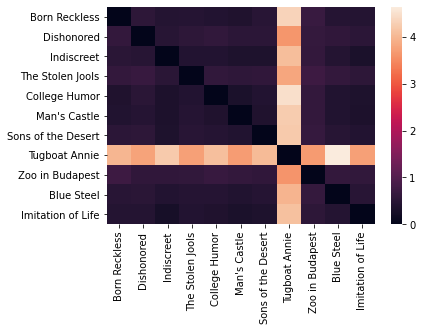

In [201]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()


To reveal more patterns, let's do a multidimensional scaling of the matrix.

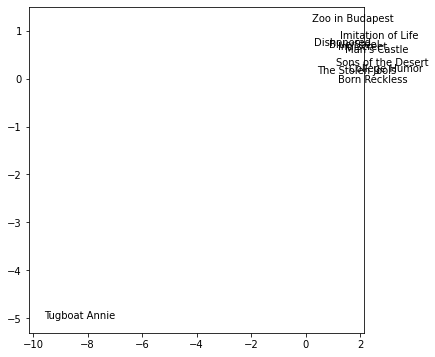

In [202]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

A co-respondent's course and The Chain Gang are away from the others - any guesses why?

We may just want to focus on the distrbution of stopwords or non-stopwords. Let's do the analysis again first for stopwords and then for non-stopwords.

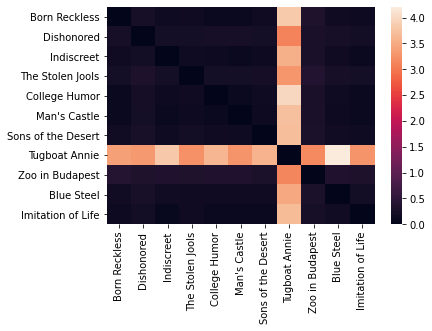

In [203]:
L = []
for p in corpora_s:
    l = []
    for q in corpora_s:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

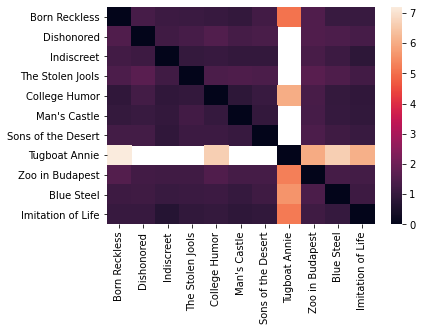

In [204]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

Now we compute the same for the assymmetric $\chi^2$ Divergence.

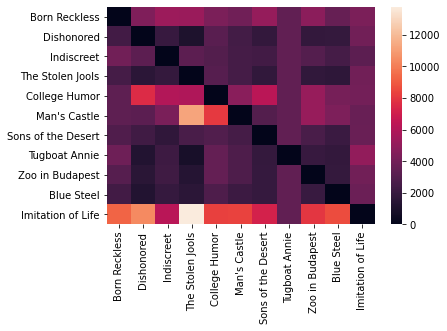

In [205]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Chi2'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

For the KS distance:

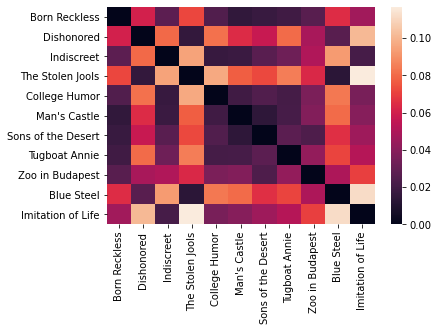

In [206]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

And finally for the Wasserstein or "earth mover's" Distance.

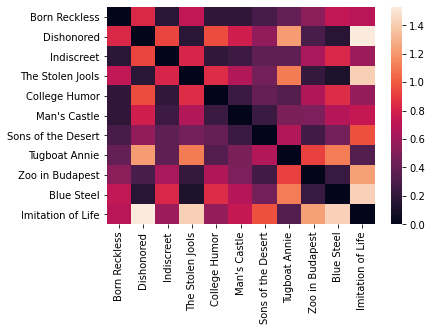

In [207]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Wasserstein'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

You can see that decade X is highly divergent and this makes reading the plot somewhat difficult. Let's fix this by taking the log of each cell, which will reduce the distance of decode X from other texts as an outlier.

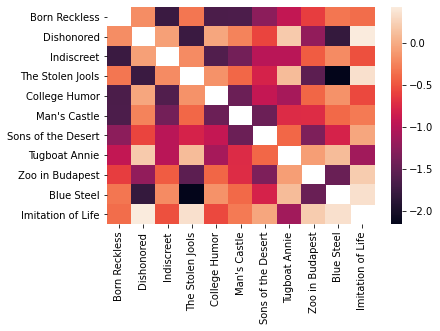

In [208]:
ax = sns.heatmap(div.apply(np.log).replace([np.inf, -np.inf], np.nan))
plt.show()

We only tried 11 movies, and from the same time period, so our signals might not be too interesting. What about different time periods?

An interesting experiment to maybe get some clearer signals: documents by decade in the Davies Corpus Of Historial American English (COHA) and see if we can detect patterns between them. 

If we want to rerun this on a new data set of our own composition, we can be a bit more efficient with our coding. Let's use the Shakespeare texts from last week as example: 

In [210]:
shakespeare_df = lucem_illud.loadTextDirectory('../data/Shakespeare')

Now we stem and remove stopwords

In [211]:
shakespeare_df['tokenized_text'] = shakespeare_df['text'].apply(lambda x: word_tokenize(x))
shakespeare_df['normalized_tokens'] = shakespeare_df['tokenized_text'].apply(lambda x: normalizeTokens(x))

Create the corpus file and generate the heatmap:

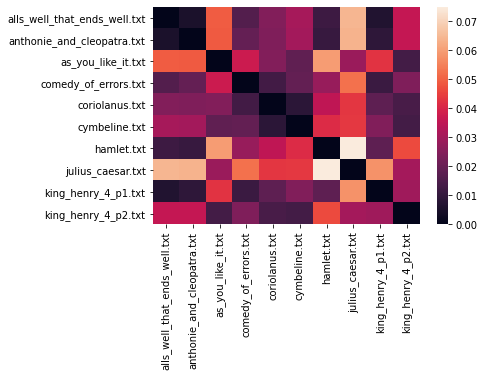

In [212]:
measure = 'KS' #"KL", "Chi2", "KS", "Wasserstein"
num_of_texts = 10 #The bigger this number the slower it will run, you can also try selecting your own plays
fileids_sp = list(shakespeare_df[:num_of_texts].index)
corpora_sp = list(shakespeare_df[:num_of_texts]['normalized_tokens'])
L = []
for p in corpora_sp:
    l = []
    for q in corpora_sp:
        l.append(Divergence(p,q, difference=measure))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_sp, index = fileids_sp)
ax = sns.heatmap(div)
plt.show()

What are "The Passionate Pilgrim" and "The Phoenix and the Turtle"? Little known poems by Shakespeare that are unsurprisingly hard to classify, as they are so different from everything else he wrote.

## <span style="color:red">*Exercise 6*</span>

<span style="color:red">Construct cells immediately below this that calculate the KL and $\chi^2$ divergences, and the KS and Wasserstein distances between four separate corpora, plot these with heatmaps, and then array them in two dimensions with multidimensional scaling as above. What does this reveal about relations between the corpora? Which analysis (and divergence or distribution) distinguishes the authors or documents better? 

<span style="color:red">**Stretch**: Calculate the <a "href=https://en.wikipedia.org/wiki/Jensen–Shannon_divergence" target="_blank">Jensen-Shannon Divergence</a> between your four corpora. What is the relationship between the KL and JS divergences?</span> 

In [37]:
democrats_df = inaugural_df_new.loc[inaugural_df_new.party=="Democratic",:]
republicans_df = inaugural_df_new.loc[inaugural_df_new.party=="Republican",:]

In [40]:
democratsWords = set(democrats_df['normalized_text'].sum())
RepublicanWords = set(republicans_df['normalized_text'].sum())

overlap_words = democratsWords & RepublicanWords
overlapWordsDict = {word: index for index, word in enumerate(overlap_words)}

democratsProbArray = makeProbsArray(democrats_df['normalized_text'], overlapWordsDict)
republicansProbArray = makeProbsArray(republicans_df['normalized_text'], overlapWordsDict)

dems_repubsDivergence = scipy.stats.entropy(democratsProbArray, republicansProbArray)
dems_repubsDivergence

0.1911448496947144

In [42]:
obamaWords = set(obama_09_extended['normalized_text'].sum())
trumpWords = set(trump_17_extended['normalized_text'].sum())

overlap_words = obamaWords & trumpWords
overlapWordsDict = {word: index for index, word in enumerate(overlap_words)}

obamaProbArray = makeProbsArray(obama_09_extended['normalized_text'], overlapWordsDict)
trumpProbArray = makeProbsArray(trump_17_extended['normalized_text'], overlapWordsDict)

obama_trumpDivergence = scipy.stats.entropy(obamaProbArray, trumpProbArray)

obama_trumpDivergence

0.2695108413759584

Above we can see that the KL divergence is larger when comparing the prob distributions of Trump's 17 speech to Obama's 09 speech rather than comparing the prob distributions of all republican presidents to all democratic presidents.

In [43]:
bush_df = inaugural_df_new.loc[(inaugural_df_new.president == "Bush") & (inaugural_df_new.year == 2001), :]
clinton_df = inaugural_df_new.loc[(inaugural_df_new.president=="Clinton") & (inaugural_df_new.year==1993),:]

In [44]:
# Merge 4 presidents of interest
presidents_compare_df = pd.concat([clinton_df, bush_df, obama_09_extended,trump_17_extended])

In [46]:
# Build corpora for comparison of different speeches
corpora = []
for index, row in presidents_compare_df.iterrows():
    if len(corpora) > 10:
        break
    corpora.append(row['normalized_text'])


corpora_s = []
corpora_nons = []
for corpus in corpora:
    s = []
    nons = []
    doc = nlp(' '.join(corpus))
    for word in doc:
        if word.is_stop:
            s.append(word.text)
        else:
            nons.append(word.text)
    corpora_s.append(s)
    corpora_nons.append(nons)

fileids = list(presidents_compare_df['president'])

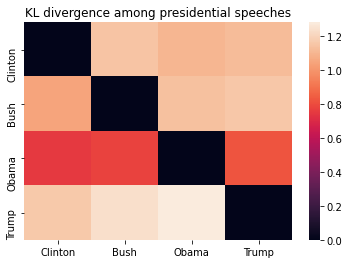

In [49]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.title("KL divergence among presidential speeches")
plt.show()

Text(0.5, 1.0, 'Multi dimensional scaling (2-D plot) plot among 4 inaugurations speeches')

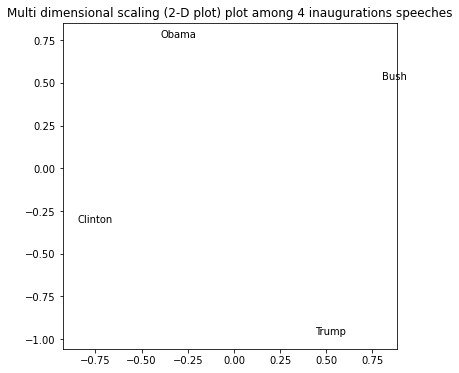

In [51]:
# Compare via multidimensional scaling
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))
plt.title("Multi dimensional scaling (2-D plot) plot among 4 inaugurations speeches")


Surprisingly we do not see a "democratic" or "republican" cluster when visualizing the 2 first coordinated of the distributions through multi-dimensional scaling. This finding is consistent with the heatmap above plotting the pairwise KL-divergence.

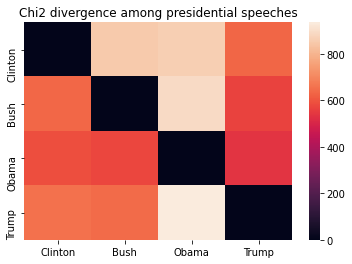

In [53]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference = 'Chi2'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.title("Chi2 divergence among presidential speeches")
plt.show()

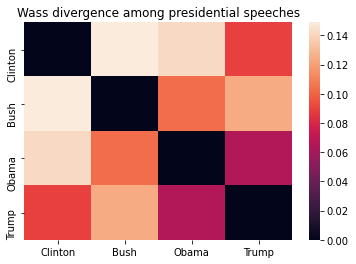

In [55]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference = 'Wasserstein'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.title("Wass divergence among presidential speeches")
plt.show()

Again, very surprisiing, but we find the divergence between the vectors for Obama and Clinton have a larger magnitude than when comparing Obama to Trump or Bush vectors. Thus the hypothesis that party affilitaion would be represented in distributional distances does not seem to hold water.